# Regression Analysis for Housing Prices in Ames, Iowa

## Overview

The value of a property is based on what buyers are willing to pay for - however, these reasons are usually complex and multifaceted. Therefore, a regression analysis is used to determine the various factors and its magnitude in influencing housing prices. 

For this project, we'll be assuming the role of business analysts at a real estate company to answer these challenges:
1. What are the key predictors of housing prices? And how much influence does the variable have on prices?
2. Which regression model would predict housing prices most accurately? Will this model be generalizable to new datasets?

Based on these findings, we'll provide real estate agents recommendations on how to utilize the regression model to help homeowners get the best price for their property. 

*Content:*

1. [Overview](#Overview)
2. [Dataset & Methodology](#Dataset-&-Methodology)
3. [Data Cleaning & Imports](#Data-Cleaning-&-Imports)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Selection & Engineering](#Feature-Selection-&-Engineering)
6. [Data Modeling & Evaluation](#Data-Modeling-&-Evaluation)
7. [Kaggle Submission](#Kaggle-Submission)
8. [Additional References](#Additional-References)
9. [Conclusion](#Conclusion)
10. [Recommendations](#Recommendations)

## Dataset & Methodology

### About the dataset

The dataset contains 2,930 observations on the sale of individual residential property in Ames, Iowa from 2006 to 2010. There are a total of 80 variables involved in assessing home values, of which 23 are nominal, 23 are ordinal, 14 are discrete, and 20 are continuous factors. 

More information on the dataset can be found here. ([*source*](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

For this project, the data has been split into two sets:
- [`Train.csv`](../datasets/train.csv): There's a total of 80 features, 1 sale price and 2,051 observations.
- [`Test.csv`](../datasets/test.csv): There's a total of 80 features and 879 observations. The sale price is missing from this set, which we will use our model to predict. 

### Methodology

For this project, we've conducted a thorough analysis and modeling through these steps:
1. **Data Cleaning**: We assessed the training dataset for any outliers and removed them immediately. We also checked for missing values where we've filled them or removed them if irrelevant.
2. **Exploratory Data Analysis**: We visualized the dataset through a series of graphs and plots to better understand the relationships between variables as well as its individual impact on housing price.
3. **Feature Selection & Engineering**: After evaluating specific variables, we removed variables that didn't have much impact on prices and combined variables that were relevant to each other.
4. **Data Modeling & Evaluation**: Following the selection of feature, we modeled them through three types of regression models - Linear, Lasso and Ridge. The best model will then be used to predict the sale prices in the test dataset. 

We've also uploaded the predicted prices on ([Kaggle](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge)) to identify the Root Mean Square Error (RMSE) - a metric that measures how far predictions vary from true values.

## Data Cleaning & Imports

### Libraries

In [1]:
# Imports:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

pd.options.display.max_rows = 110

### Loading the dataset

In [2]:
housing_train = pd.read_csv('../datasets/train.csv')
housing_test = pd.read_csv('../datasets/test.csv')

In [3]:
housing_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Cleaning dataset

In [5]:
# Convert MS Zoning to strings as it's a categorical variable

housing_train['MS SubClass'] = housing_train['MS SubClass'].astype(str)

In [6]:
# View summary statistics of all variables

housing_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051.0,NaN,NaN,NaN,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051,16,20,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721.0,NaN,NaN,NaN,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0
Lot Area,2051.0,NaN,NaN,NaN,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

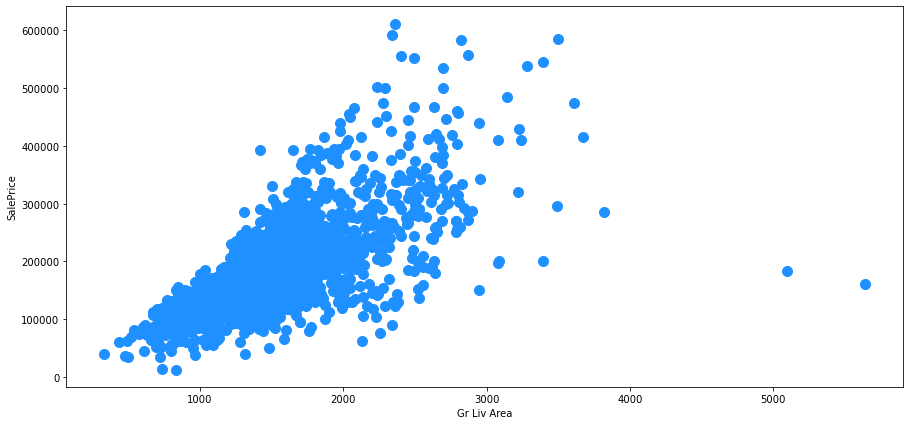

In [7]:
# Based on the data dictionary provided, we'll first plot Ground Living Area against Sale Price to identify any outliers

housing_train.plot(x='Gr Liv Area', y='SalePrice', kind='scatter', color='dodgerblue', figsize=(15,7), s=100)

In [8]:
# View the dataset with Ground Living Area exceeding 4,000 square feet

housing_train[housing_train['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [9]:
# Remove outliers: Ground Living Area above 4,000 square feet

indexGr_floor = housing_train[housing_train['Gr Liv Area'] > 4000].index
housing_train.drop(indexGr_floor, axis=0, inplace=True)

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

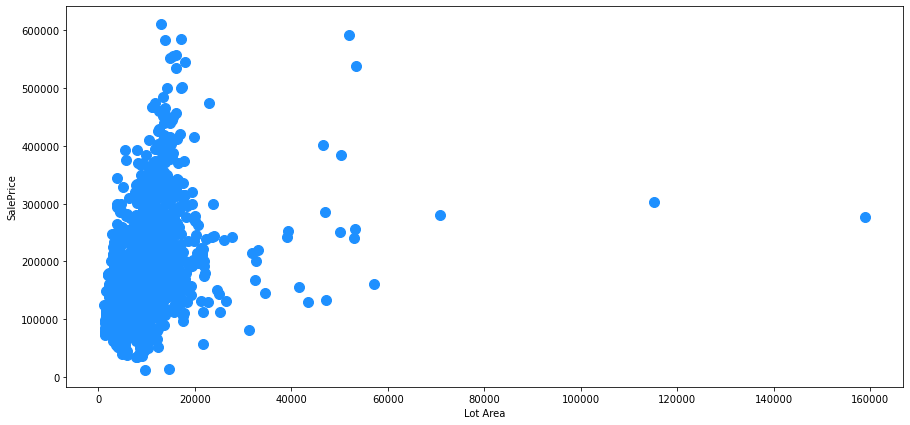

In [10]:
# Check for outliers for Lot Area against Sale Price

housing_train.plot(x='Lot Area', y='SalePrice', kind='scatter', color='dodgerblue', figsize=(15,7), s=100)

In [11]:
# View the dataset with Lot Area exceeding 100,000 square feet

housing_train[housing_train['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


In [12]:
# Remove outliers: Lot area above 100,000 square feet

indexLot = housing_train[housing_train['Lot Area'] > 100000].index
housing_train.drop(indexLot, axis=0, inplace=True)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

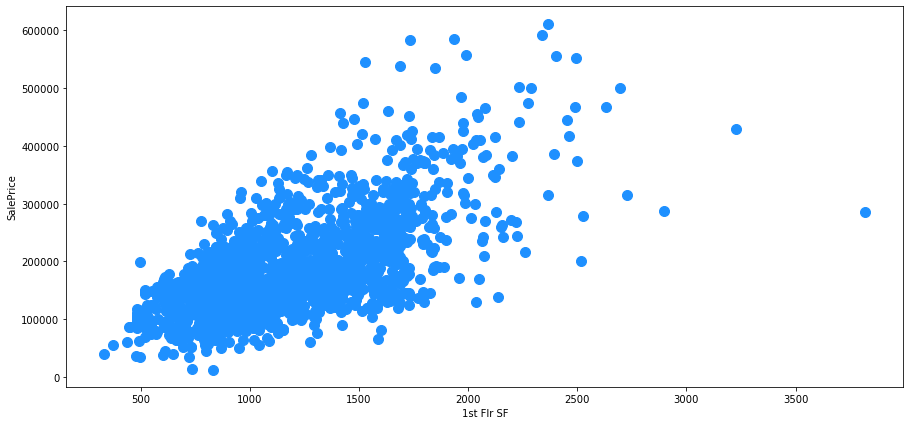

In [13]:
# Check for outliers for 1st Floor Area Square Feet against Sale Price

housing_train.plot(x='1st Flr SF', y='SalePrice', kind='scatter', color='dodgerblue', figsize=(15,7), s=100)

In [14]:
# Remove outliers: 1st Floor Area above 3,500 square feet

housing_train[housing_train['1st Flr SF'] > 3500]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [15]:
# Remove outliers: 1st Floor Area above 3,500 square feet

index_1_st = housing_train[housing_train['1st Flr SF'] > 3500].index
housing_train.drop(index_1_st, axis=0, inplace=True)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

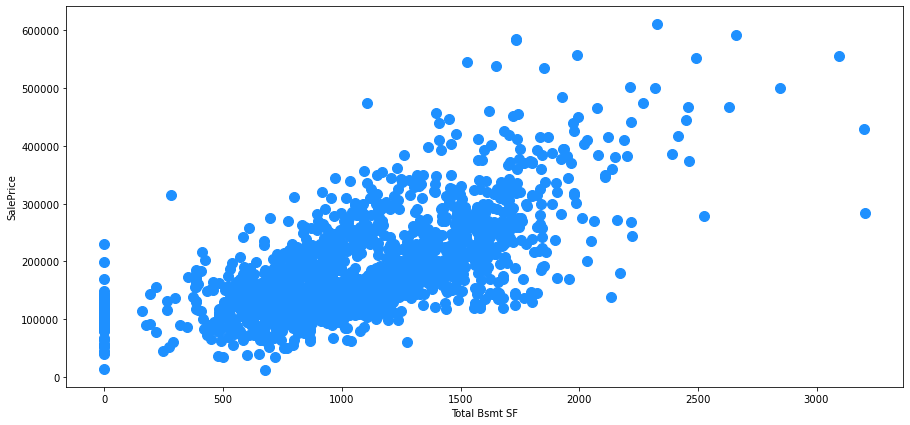

In [16]:
# Check if there's any outliers in total basement square feet
# There's no outlier so we can retain the datapoints for now

housing_train.plot(x='Total Bsmt SF', y='SalePrice', kind='scatter', color='dodgerblue', figsize=(15,7), s=100)

In [17]:
# Check for dataframe shape

housing_train.shape

(2046, 81)

In [18]:
# Check for null values

housing_train.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           2038
Misc Feature      1983
Alley             1906
Fence             1646
Fireplace Qu      1000
Lot Frontage       328
Garage Yr Blt      114
Garage Qual        114
Garage Cond        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       57
BsmtFin Type 2      55
BsmtFin Type 1      54
Bsmt Cond           54
Bsmt Qual           54
Mas Vnr Area        22
Mas Vnr Type        22
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Half Bath       1
Bsmt Full Bath       1
Garage Area          1
Garage Cars          1
Gr Liv Area          0
Misc Val             0
Sale Type            0
Full Bath            0
dtype: int64

### Closer look at features with high null values

- `Pool QC` is an ordinal variable of pool quality, the measure range from Excellent to NA (No pool). Based on the high 'NA' input, we can deduce that almost all of the houses in this dataset does not have a pool. 
- `Misc Feature` is a nominal variable of features not covered in the other variables, e.g. elevator, additional garage, sheds, tennis court, etc. More than half of the input selected "None", indicating that most houses likely don't have miscellaneous features. It would be difficult to estimate the monetary value of this variable, as we will require more details on the specific feature, for example a tennis court would be more expensive than an elevator.
- `Alley` is a nominal features that refers to the alley access to the house. Most of the houses indicated that they do not have alley access, hence this may not be a pressing determinant of housing price.
- `Fence` is an ordinal variable which measures the fence quality. This dataset shows that more than half of the houses don't have a fence. 
- `Fireplace Qu` is an ordinal variable which measures fireplace quality in a house. While not more than half of the dataset, a significant of houses don't have fireplaces. Meanwhile when we look at the earlier summary, the highest frequency of quality indicated is 523 good masonry fireplace in the house.

Therefore, we can remove these features first before taking a closer look at the other null values.

In [19]:
# Remove columns with high number of nulls, as these are not pressing factors in housing purchases

housing_train.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
housing_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'G

In [20]:
# Check for remaining columns with null values

housing_train.isnull().sum().sort_values(ascending = False).head(25)

Lot Frontage      328
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      57
BsmtFin Type 2     55
Bsmt Cond          54
Bsmt Qual          54
BsmtFin Type 1     54
Mas Vnr Area       22
Mas Vnr Type       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Area         1
Garage Cars         1
Bsmt Half Bath      1
Bsmt Full Bath      1
Total Bsmt SF       1
Full Bath           0
Gr Liv Area         0
Half Bath           0
Bedroom AbvGr       0
dtype: int64

For Lot Frontage (linear feet of street to house), we can assume that the lot frontage is similar to houses within the same neighborhood. We can fill the missing values based on the average lot frontage for each neighborhood.

In [21]:
# First, we'll identify the average lot frontage for each neighborhood

front_means = housing_train.groupby('Neighborhood')['Lot Frontage'].mean()
front_means

Neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    64.047619
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     61.890625
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: Lot Frontage, dtype: float64

In [22]:
# Map the average lot frontage to the missing cells based on the neighborhood

housing_train['Lot Frontage'] = housing_train.apply(lambda x: front_means[x['Neighborhood']] if np.isnan(x['Lot Frontage']) else x['Lot Frontage'], axis=1)

In [23]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(25)

Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      57
BsmtFin Type 2     55
Bsmt Cond          54
BsmtFin Type 1     54
Bsmt Qual          54
Mas Vnr Area       22
Mas Vnr Type       22
Lot Frontage        3
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Area         1
Garage Cars         1
Bsmt Half Bath      1
Bsmt Full Bath      1
Total Bsmt SF       1
Full Bath           0
Gr Liv Area         0
Half Bath           0
Bedroom AbvGr       0
dtype: int64

But there's still missing Lot Frontage values, as two of the neighborhoods (`GrnHill` and `Landmrk`) didn't have any Lot Frontage value. To fill the missing values, we'll use the average value for all the properties.

In [24]:
# We'll assign the average Lot Frontage for all properties to these missing values:

housing_train['Lot Frontage'] = housing_train['Lot Frontage'].fillna(housing_train['Lot Frontage'].mean())

In [25]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(20)

Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      57
BsmtFin Type 2     55
Bsmt Cond          54
Bsmt Qual          54
BsmtFin Type 1     54
Mas Vnr Type       22
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Area         1
Garage Cars         1
Bsmt Half Bath      1
Bsmt Full Bath      1
Total Bsmt SF       1
dtype: int64

In [26]:
# There's a discrepancy in the Garage-related features, they should all be the same figure. 

housing_train[(housing_train['Garage Finish'].isnull()) & (housing_train['Garage Type'].notnull())][['Id', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond']]

,Id,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,2237,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


After checking, it appears that there may have been an error in the data. The row of data shows that there's a garage detached from the house but there's no garage-related information. We will have to omit this data.

In [27]:
# Remove the row of data with discrepancy

index_id = housing_train[housing_train['Id'] == 2237].index
housing_train.drop(index_id, axis=0, inplace=True)

For the remaining garage-related variables that are NA, these indicate that the houses do not have garage. So we'll replace the values with 'None' or '0'.

In [28]:
# Replace missing values with 'None' or '0'

housing_train['Garage Type'] = housing_train['Garage Type'].fillna('None')
housing_train['Garage Yr Blt'] = housing_train['Garage Yr Blt'].fillna(0)
housing_train['Garage Finish'] = housing_train['Garage Finish'].fillna('None')
housing_train['Garage Qual'] = housing_train['Garage Qual'].fillna('None')
housing_train['Garage Cond'] = housing_train['Garage Cond'].fillna('None')

In [29]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(15)

Bsmt Exposure     57
BsmtFin Type 2    55
BsmtFin Type 1    54
Bsmt Qual         54
Bsmt Cond         54
Mas Vnr Type      22
Mas Vnr Area      22
BsmtFin SF 1       1
Total Bsmt SF      1
BsmtFin SF 2       1
Bsmt Unf SF        1
Bsmt Half Bath     1
Bsmt Full Bath     1
TotRms AbvGrd      0
Full Bath          0
dtype: int64

Similar to garage-related variables, for basement-related variables with NA input does not have any basement. So we can proceed to replace missing values in the categorical variables with 'None'.

In [30]:
# Replace missing values with 'None' or '0'

housing_train['Bsmt Exposure'] = housing_train['Bsmt Exposure'].fillna('None')
housing_train['BsmtFin Type 2'] = housing_train['BsmtFin Type 2'].fillna('None')
housing_train['BsmtFin Type 1'] = housing_train['BsmtFin Type 1'].fillna('None')
housing_train['Bsmt Qual'] = housing_train['Bsmt Qual'].fillna('None')
housing_train['Bsmt Cond'] = housing_train['Bsmt Cond'].fillna('None')

In [31]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(10)

Mas Vnr Type       22
Mas Vnr Area       22
Total Bsmt SF       1
BsmtFin SF 1        1
Bsmt Full Bath      1
Bsmt Half Bath      1
BsmtFin SF 2        1
Bsmt Unf SF         1
2nd Flr SF          0
Low Qual Fin SF     0
dtype: int64

In [32]:
# View missing dataset for Total Basement Area square feet

housing_train[(housing_train['Total Bsmt SF'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


In [33]:
# View missing dataset for Basement Finished Area Type 1 square feet 

housing_train[(housing_train['BsmtFin SF 1'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


In [34]:
# View missing dataset for Basement Full Bath

housing_train[(housing_train['Bsmt Full Bath'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


In [35]:
# View missing dataset for Basement Half Bath

housing_train[(housing_train['Bsmt Half Bath'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


In [36]:
# View missing dataset for Basement Finished Area Type 1 square feet 

housing_train[(housing_train['BsmtFin SF 2'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


In [37]:
# View missing dataset for Basement Unfinished Area Square Feet

housing_train[(housing_train['Bsmt Unf SF'].isnull())][['Id', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Id,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,None,None,None,None,NaN,None,NaN,NaN,NaN


Seeing that all of the remaining missing values for basement are from the same row, we can assume that this house does not have a basement. We can replace the values with 0.

In [38]:
# Replace missing values with '0'

housing_train['Total Bsmt SF'] = housing_train['Total Bsmt SF'].fillna(0)
housing_train['BsmtFin SF 1'] = housing_train['BsmtFin SF 1'].fillna(0)
housing_train['BsmtFin SF 2'] = housing_train['BsmtFin SF 2'].fillna(0)
housing_train['Bsmt Unf SF'] = housing_train['Bsmt Unf SF'].fillna(0)
housing_train['Bsmt Full Bath'] = housing_train['Bsmt Full Bath'].fillna(0)
housing_train['Bsmt Half Bath'] = housing_train['Bsmt Half Bath'].fillna(0)

In [39]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(5)

Mas Vnr Type     22
Mas Vnr Area     22
Id                0
Full Bath         0
TotRms AbvGrd     0
dtype: int64

Similar to garage-related and basement-related variables, for masonry-related variables with NA input indicate that the house does not have masonry. So we can proceed to replace missing values in the categorical variables with 'None' or 0.

In [40]:
# Replace missing values with 'None' or '0'

housing_train['Mas Vnr Type'] = housing_train['Mas Vnr Type'].fillna('None')
housing_train['Mas Vnr Area'] = housing_train['Mas Vnr Area'].fillna(0)

In [41]:
# Check for remaining null values

housing_train.isnull().sum().sort_values(ascending = False).head(5)

Id                0
Bsmt Half Bath    0
Functional        0
TotRms AbvGrd     0
Kitchen Qual      0
dtype: int64

In [42]:
# Remove Parcel ID (PID) column as it's not critical in predicting house price

housing_train.drop('PID', axis=1, inplace=True)
housing_train.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage A

In [43]:
# Check for overall statistics

housing_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2045.0,NaN,NaN,NaN,1472.684597,844.681177,1.0,752.0,1479.0,2199.0,2930.0
MS SubClass,2045,16,20,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS Zoning,2045,7,RL,1593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2045.0,NaN,NaN,NaN,69.435149,20.955213,21.0,60.0,70.0,80.0,313.0
Lot Area,2045.0,NaN,NaN,NaN,9882.811247,5177.220407,1300.0,7500.0,9400.0,11500.0,70761.0
Street,2045,2,Pave,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2045,4,Reg,1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2045,4,Lvl,1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2045,3,AllPub,2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Config,2045,5,Inside,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As some of the categorical data has similar values, these features exhibit low variance and don't provide any pattern for our modeling process later. Therefore we can set a threshold of 75% of total entries and remove categorical variables with frequency more than 1,535:
- `MS Zoning`
- `Street` (type of road access)
- `Land Contour`
- `Utilities` type
- `Land Slope` 
- `Condition 1`
- `Condition 2`
- `Building type`
- `Roof style`
- `Roof material`
- `External Cond`ition of material, 
- `Bsmt Condition` (Basement)
- `BsmtFin Type 2` (Basement Finishing Type 2) 
- `Heating` 
- `Central Air`
- `Electrical`
- `Functional`
- `Garage Quality`
- `Garage Condition`
- `Paved Drive`
- `Sale Type`

In [44]:
# Drop variables with high frequency/low variance

housing_train.drop(['MS Zoning', 'Street', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type'], axis=1, inplace=True)

In [45]:
# Check for info and current columns

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2045 non-null   int64  
 1   MS SubClass      2045 non-null   object 
 2   Lot Frontage     2045 non-null   float64
 3   Lot Area         2045 non-null   int64  
 4   Lot Shape        2045 non-null   object 
 5   Lot Config       2045 non-null   object 
 6   Neighborhood     2045 non-null   object 
 7   House Style      2045 non-null   object 
 8   Overall Qual     2045 non-null   int64  
 9   Overall Cond     2045 non-null   int64  
 10  Year Built       2045 non-null   int64  
 11  Year Remod/Add   2045 non-null   int64  
 12  Exterior 1st     2045 non-null   object 
 13  Exterior 2nd     2045 non-null   object 
 14  Mas Vnr Type     2045 non-null   object 
 15  Mas Vnr Area     2045 non-null   float64
 16  Exter Qual       2045 non-null   object 
 17  Foundation    

In [46]:
# Move Sale Price column to the first

first_col = housing_train.pop('SalePrice')
housing_train.insert(0, 'SalePrice', first_col)

In [47]:
# View columns

housing_train.columns

Index(['SalePrice', 'Id', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Lot Config', 'Neighborhood', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

## Exploratory Data Analysis

### Heatmap 

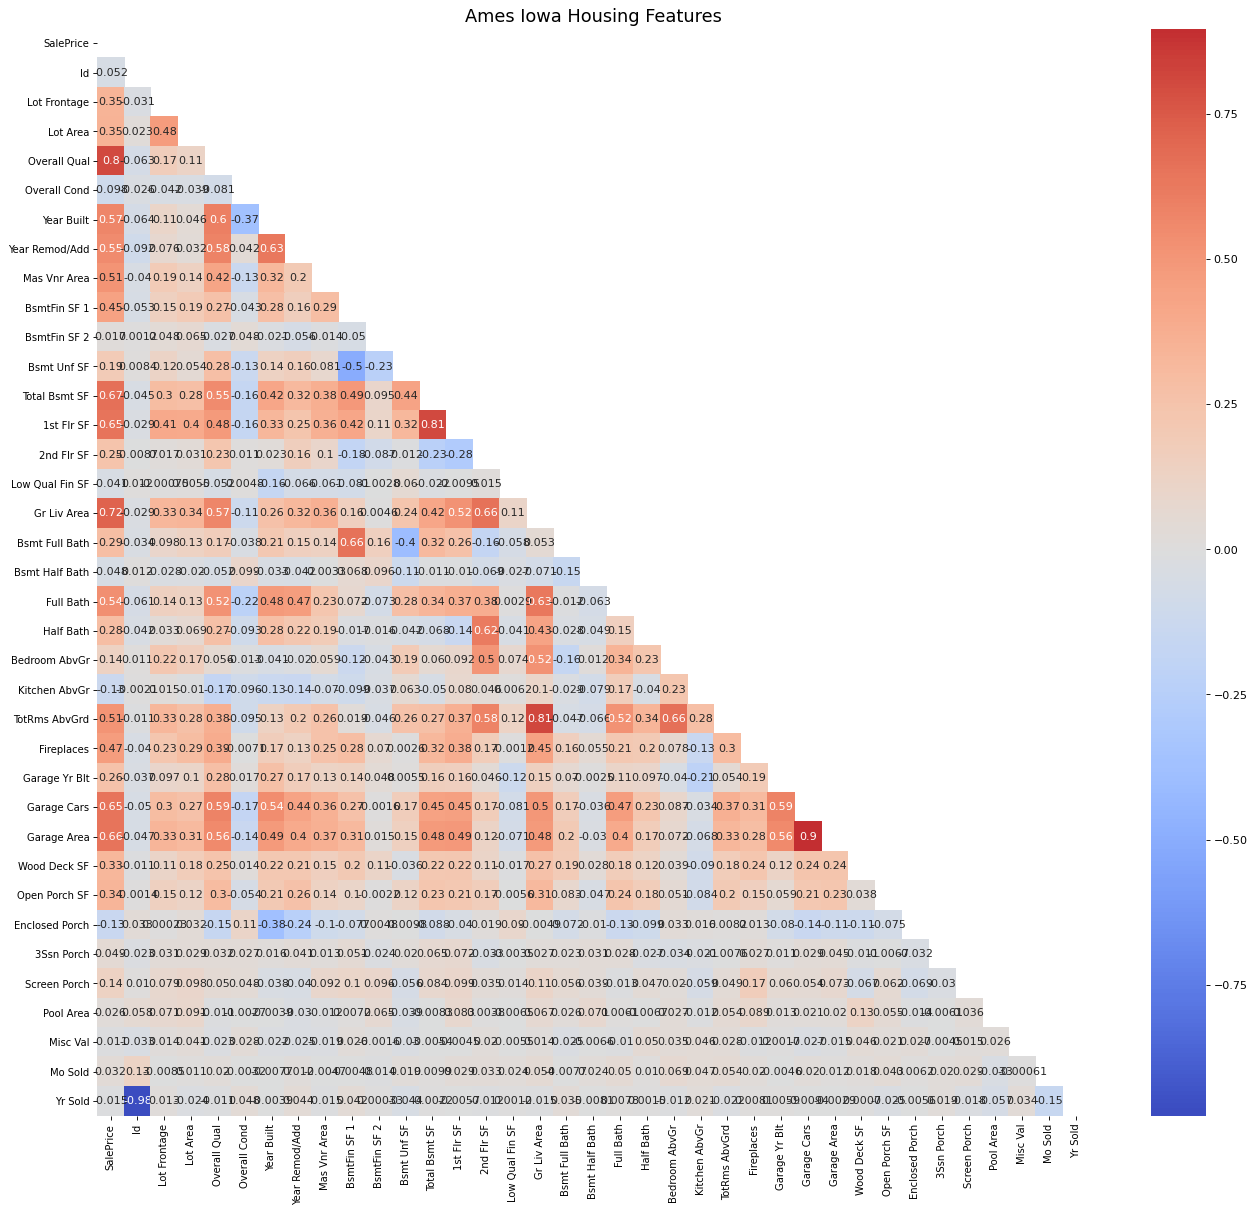

In [48]:
# Plot heatmap to view variables correlation with each other and Sale Price

# Mask to prevent duplication of variables
mask = np.zeros(housing_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

# Heatmap plot
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(housing_train.corr(), xticklabels=housing_train.corr().columns, yticklabels=housing_train.corr().columns, cmap='coolwarm', center=0, annot=True, mask=mask)

# Heatmap decorations
plt.title('Ames Iowa Housing Features', fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

Based on the heatmap above, 

1. At first glance, we see a number of variables with very low correlation to Sale Price (below 0.3 or above -0.3) apart from `Id`. We may want to consider removing these features: 
    - `Overall Cond`, `BsmtFin SF 2`, `Bsmt Unf SF`, `2nd Flr SF`, `Low Qual Fin SF`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Half Bath`, `Bedroom AbvGr`, `Kitchen AbvGr`, `Garage Yr Blt`, `Enclosed Porch`, `Screen Porch`, `3Ssn Porch`, `Pool Area`, `Misc Val`, `Mo Sold`, `Yr Sold` 
    
2. Top three features with the highest correlation to Sale Price: `Overall Qual`, `Locality`, `Gr Liv Area`
    - We'd assume that `Overall Cond` would be similar, but this variable has a much lower correlation score. We can deduce that the house price is determined by the material and finishing of the house, more than the rating of overall condition (this can be a very subjective measure as well).
    
3. We see relatively high correlation for some of the features that could be related to each other (above 0.3 or below -0.3). We could look at combining these features after assessing their distribution and multicollinearity:
    - Location: `Locality`, `Overall Qual`, `Year Built`
    - Overall lot: `Lot Frontage` and `Lot Area`
    - Timing: `Year Built`, `Year Remod/Add`, `Mo Sold`, `Yr Sold`
    - Floor Plan SF: 
        - `BsmtFin SF 1`, `Bsmt Full Bath`
        - `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area`
        - `Full Bath`, `Gr Liv Area`
    - Above grade: `Bedroom AbvGr` and `TotRms AbvGrd`
    - Garage: `Garage Cars` and `Garage Area`

Before deciding to remove / change any of these variables, we'll continue to assess the dataset.

In [49]:
# Function to customize multiple scatter plots

def multi_scatter(dataframe, columns, target):    
    nrows = int(np.ceil(len(columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5))
    ax = ax.ravel()
    
    for i, column in enumerate(columns):
        g = sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, line_kws={'color': 'red'})
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Scatterplot of Numerical Features vs Sale Price', fontsize=20, y=1.015)

### Scatter plots

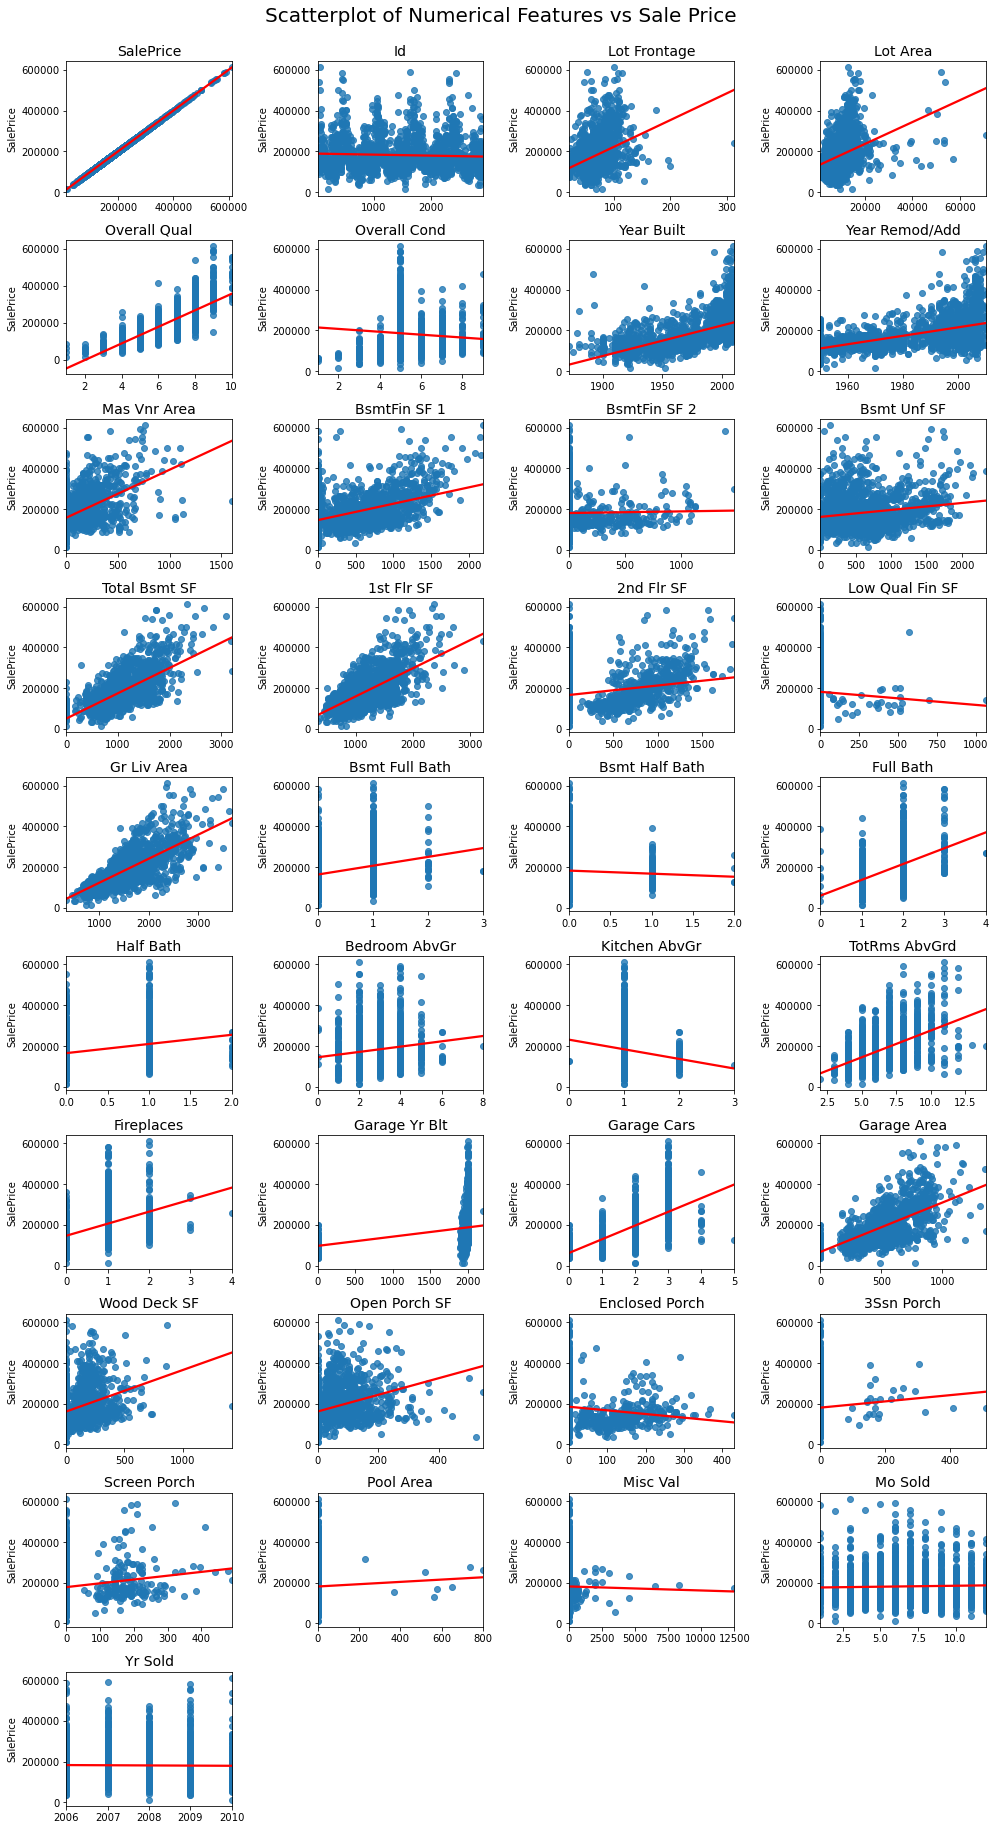

In [50]:
# Map numerical columns to Sale Price in multiple scatter plots

numeric_col = [col for col in housing_train._get_numeric_data().columns]
multi_scatter(housing_train, numeric_col, 'SalePrice')

Based on the scatter plots above, 

1. Features that exhibit positive and strong linear relationship against `Sale Price`: `Lot Frontage`, `Lot Area`, `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area`, `Garage Area`, `Wood Deck SF`, `Open Porch SF`, `Locality` . 
2. Some of the discrete variables show some relationship: `Overall Qual`, `Full Bath`, `Half Bath`, `Fireplaces`, `Garage Cars`. These features can be engineered into continuous feature, so we can test them against `Sale Price`. 
3. A significant number of the discrete features exhibit weak, near zero relationship (no correlation): `Overall Cond`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Bedroom AbvGr`, `Kitchen AbvGr`, `Garage Yr Blt`, `Yr Sold`. We would need to combine these with other related features to test against `Sale Price` or discard, based on other analysis.
4. Some of the relationships are weak and/or zero with high counts of ‘0’, so we can consider discarding them before modeling:  `BsmtFin SF 1`, `BsmtFin SF 2`, `2nd Flr SF`, `Low Qual Fin SF`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Pool Area`, `Misc Val`.

In [51]:
# Function to customize multiple histograms

def multi_histo(dataframe, columns):
    nrows = int(np.ceil(len(columns)/5)) 
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(14, nrows*2.5)) 
    ax = ax.ravel() 
    
    for i, column in enumerate(columns): 
        mean = np.mean(dataframe[columns[i]])
        ax[i].axvline(mean, ls='--', color='red')
        
        sns.histplot(data=dataframe, x=dataframe[column], kde=False, ax=ax[i], fill=False)
        ax[i].set_title(column,fontsize=14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout(h_pad=-0.4, w_pad=-0.4)
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y=1.015)

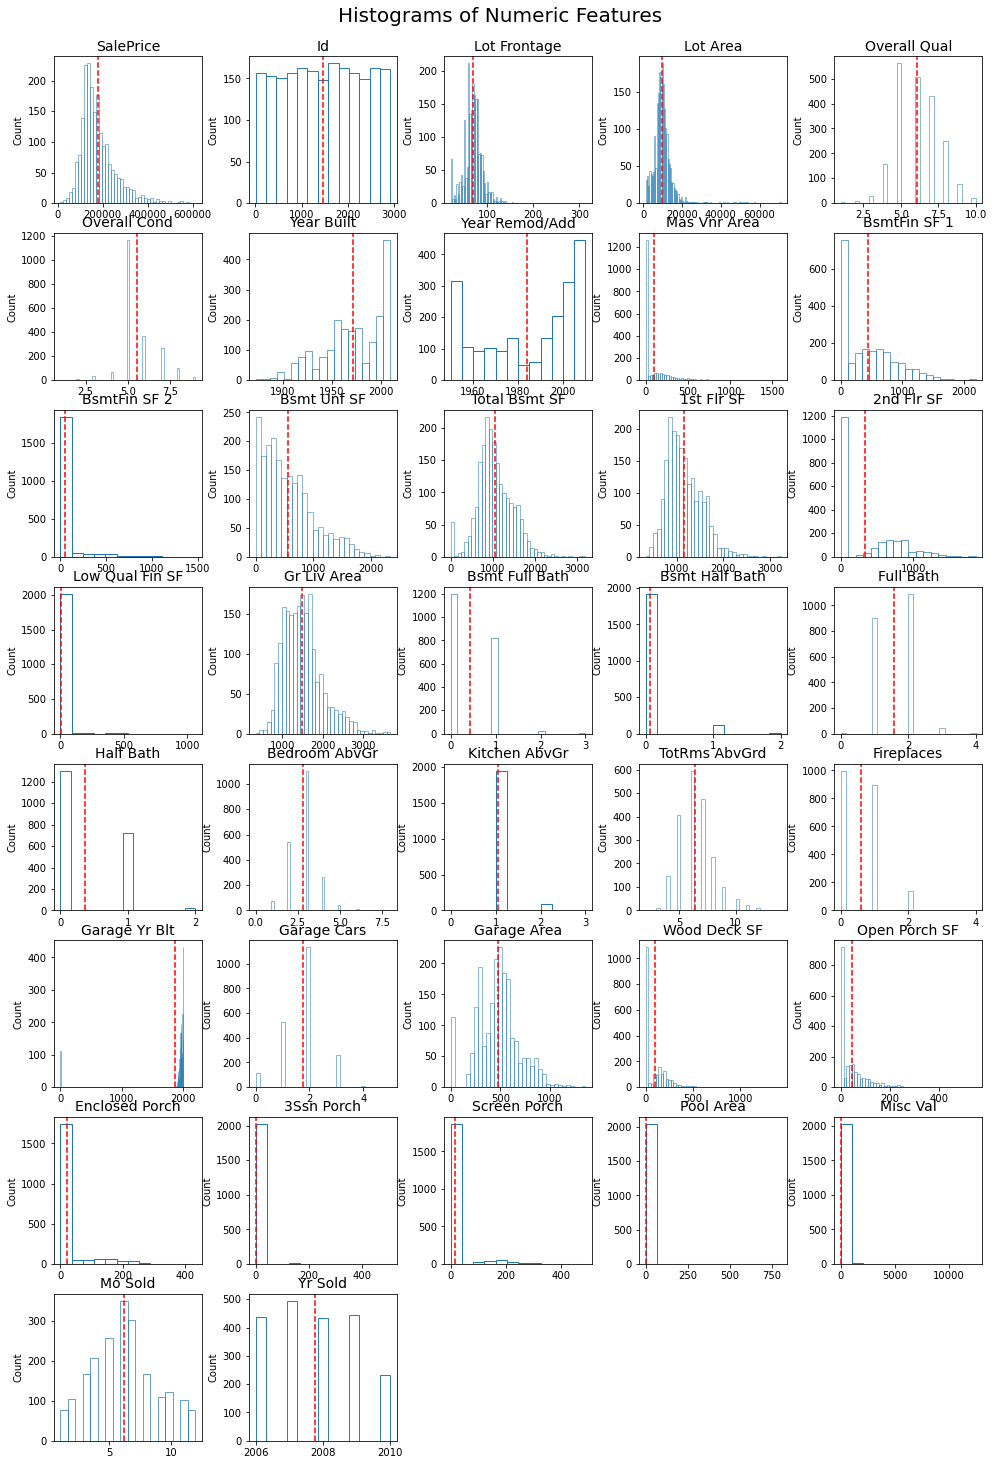

In [52]:
# Map numerical columns to Sale Price in multiple histograms

multi_histo(housing_train, numeric_col)

In the above histograms, 

1. `Sale Price` data is somewhat normal leaning towards a right-skew, where more of the housing price are on the higher end. Marked by the dotted line, the mean Sale Price is higher than the mode.
2. `Lot Frontage`, `Lot Area`, `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area`, and `Garage Area` demonstrate similar distribution to `Sale Price` - so we may be able to retain these features as-is.
3. In line with the heat map and scatter plots, we continue to see non-symmetrical distribution with high zero counts for: `BsmtFin SF 1`, `BsmtFin SF 2`, `2nd Flr SF`, `Low Qual Fin SF`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Pool Area`, `Misc Val`.
4. `Wood Deck SF` and `Open Porch SF` appear non-symmetrical and have high counts of zero, although it was not obvious in previous charts. These variables may not be important determinants of housing price.


### Boxplots

In [53]:
# Function for multiple boxplots, specific for categorical features

def multi_boxplots(dataframe, columns, target):    
    nrows = int(np.ceil(len(columns)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
    ax = ax.ravel() 
    
    for i, column in enumerate(columns):
        g = sns.boxplot(data=dataframe, y=column, x=target, ax=ax[i], palette='pastel', orient='h')
        ax[i].set_title(column, fontsize=16)
        g.set(xlabel=None)
        g.set(ylabel=None)
        g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels=['0k','100k','200k','300k','400k','500k','600k'])
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Categorical Features vs Sale Price', fontsize=30, y=1.015)

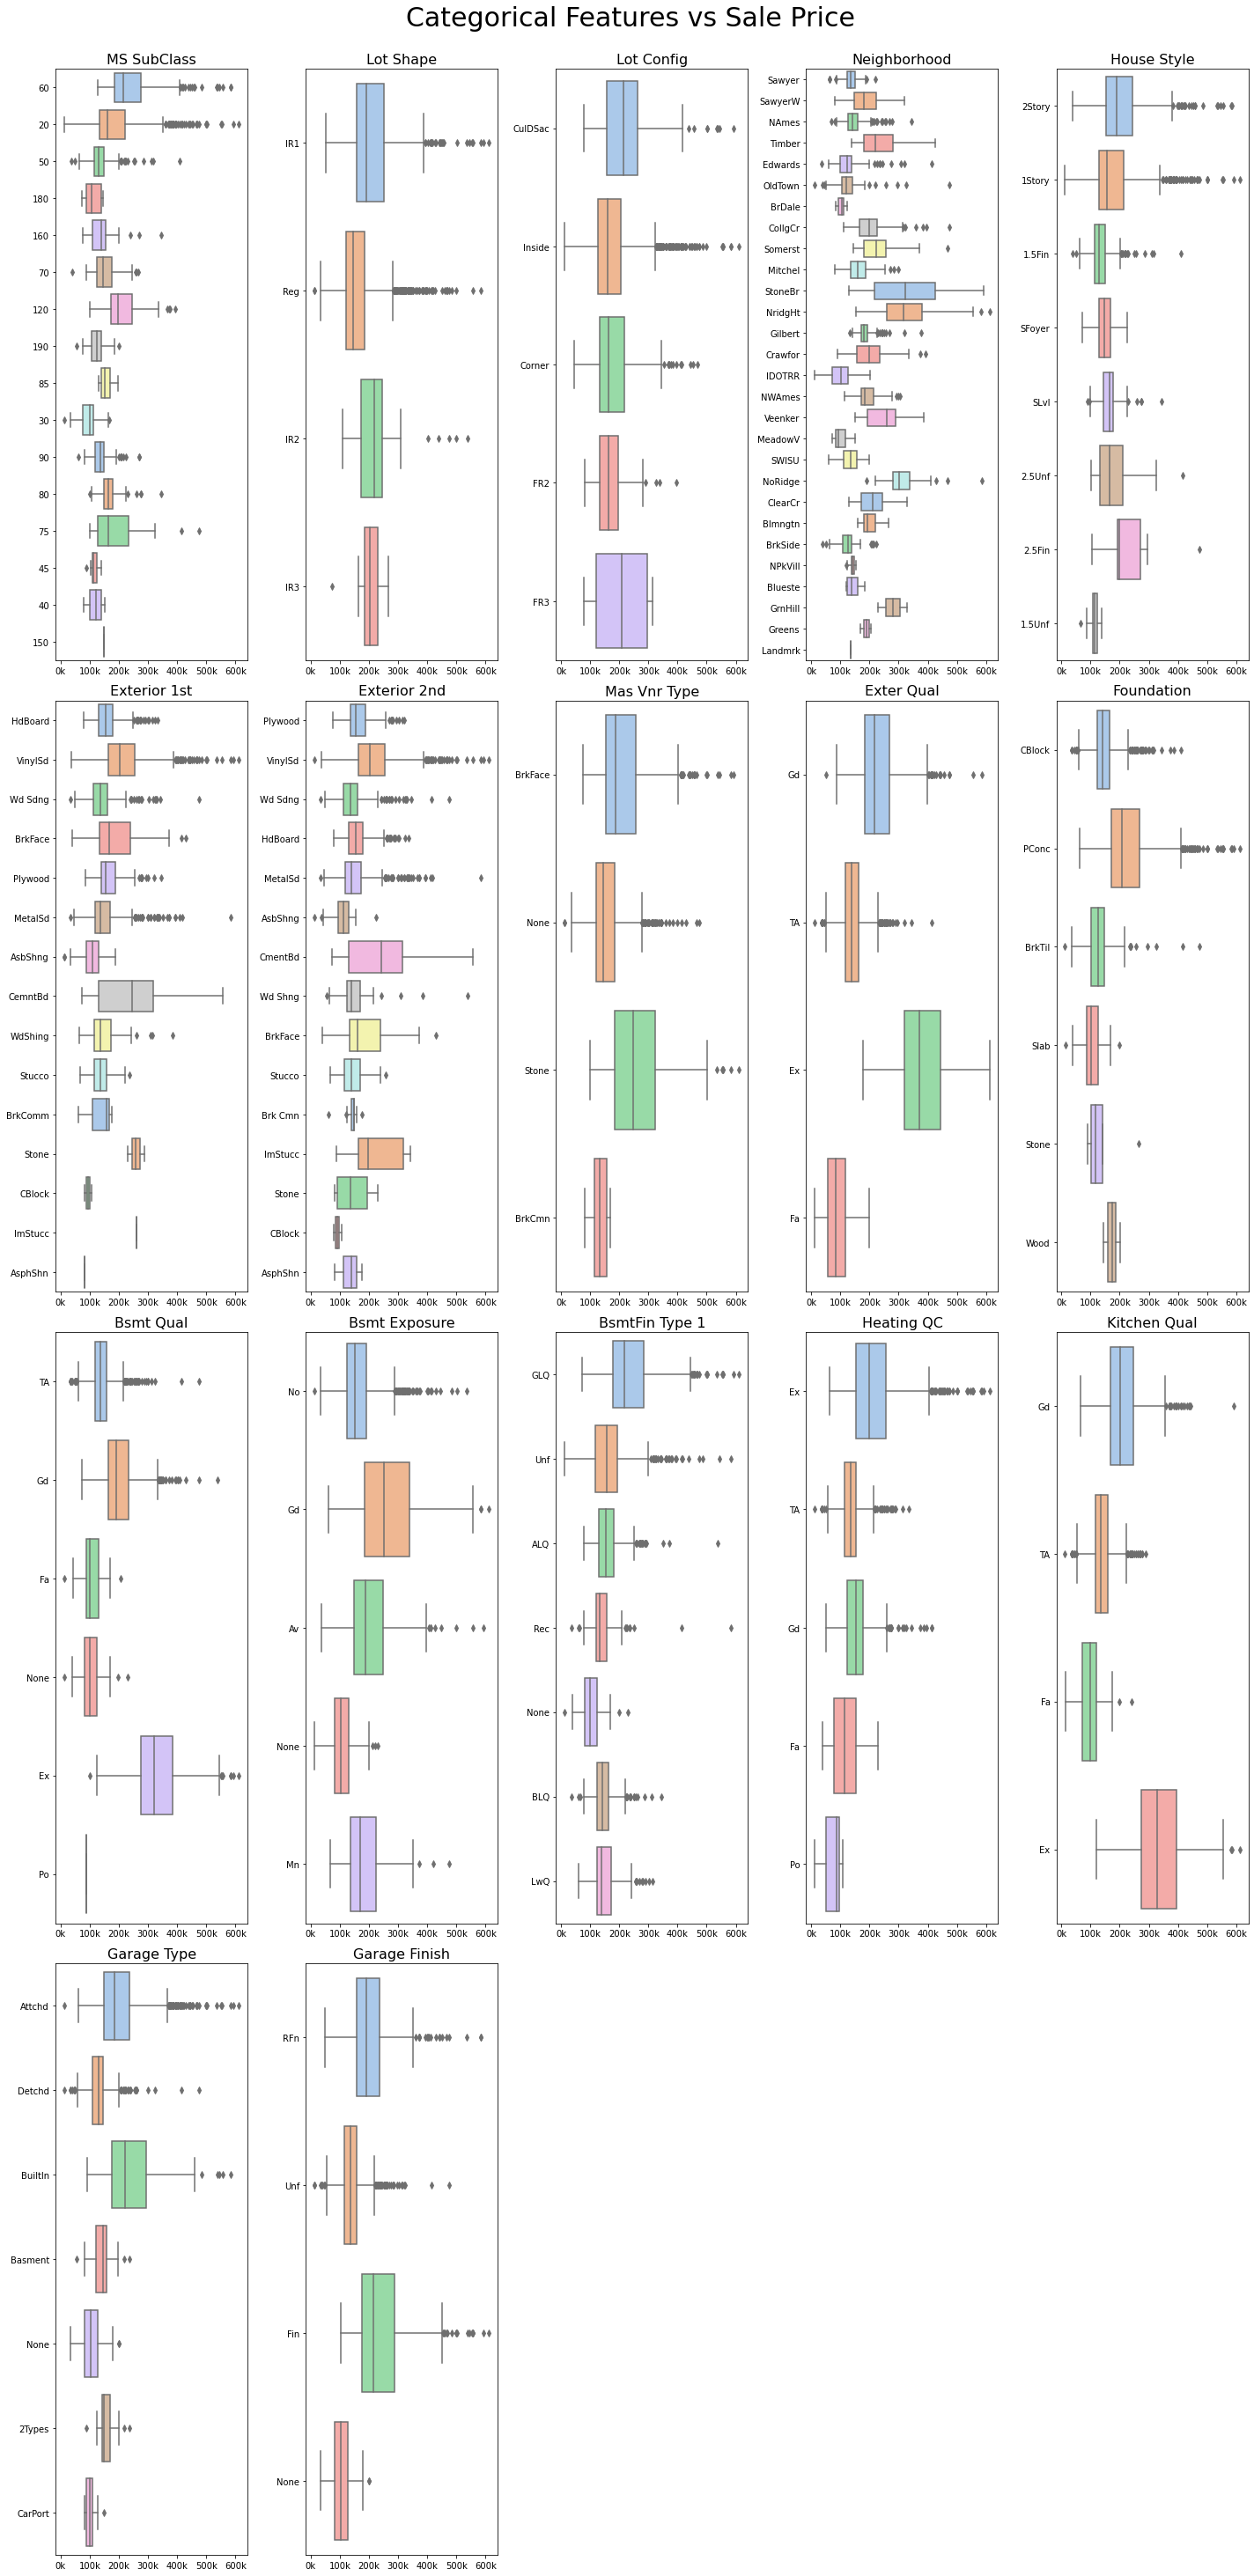

In [54]:
# Map categorical columns to Sale Price in boxplots

categorical_col = [col for col in housing_train.select_dtypes(include=['object']).columns]
multi_boxplots(housing_train, categorical_col, 'SalePrice')

In the box plots of categorical features against Sale Price above, we can see that

1. `MS SubClass`: Houses with types 2-Story 1946 and newer (`060`), 1-Story 1946 and newer (`020`), and 2-1/2 Story all ages (`075`) saw higher Sale Price compared to other styles. 
2. `House Style`: While most plots are normally distributed, we can see that 2-Story and 1-Story houses have more outlier data with much higher Sale Price. We may want to remove outlier on instinct, but the significant number of outliers could signify a trend for us to look out for. 
3. `Lot Shape`, `Lot Config` : The data seem more normally distributed against Sale Price and the particular type does not have much impact on Sale Price.
4. `Neighborhood`: It appears that certain neighborhood clusters have distinctly higher prices and more spread out data, e.g. Stone Brook (`StoneBr`) and Northridge Heights (`NridgHt`).
5. `Exterior 1st`, `Exterior 2nd`: Houses with higher prices tend to have Vinyl siding (`VinylSd`) and Cement board (`CemntBd`). We may want to consider combining these features.
6. `Exter Qual`, `Bsmt Qual`, `Bsmt Exposure`, `Heating QC`, `Kitchen Qual`: It’s no surprise that these feature quality rated ‘Excellent’ and ‘Good’ would sell at higher price. However the distribution for the ones rated Average/Typical (`TA`) and Fair (`FA`) appear similar, so we could look at consolidating these score prior to modeling or future studies. 
7. `Mas Vnr Type`: Most of the masonry veneer are either Brick Face (`BrkFace`) or Stone (`Stone`), and the distribution look similar and the difference in price appears minimal.
8. `Foundation`: Houses with poured concrete (`PConc`) foundation appear to have higher prices. The remaining materials have similar distribution, so we may want to remove this feature as it's likely to skew towards concrete.
9. `BsmtFin Type 1`: While it’s natural for basement finished area that were rated “good” (`GLQ`) would sell at a higher price, but it’s interesting to note that unfinished basement (`Unfinished`) were also selling at higher price, there may be interest to renovate this space. But we would have to assess this variable further.
10. `Garage Type`: Houses selling at higher prices have attached (`Attchd`) or built-in garages (`BuiltIn`).
11. `Garage Finish`: In terms of garage finishing, the ones with finished interior (`Fin`) and rough finished interior (`Rfn`) were selling at higher prices - the distributions look similar. 

In [55]:
# Check for dataframe shape

housing_train.shape

(2045, 54)

Based on the box plots of categorical variable, we can drop those with less impact on price and low variation of data.

In [56]:
# Drop columns with distribution that demonstrate low variation and impact on prices

housing_train.drop(['Lot Shape', 'Lot Config', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type'], axis=1, inplace=True)

In [57]:
# Check for dataframe info

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalePrice        2045 non-null   int64  
 1   Id               2045 non-null   int64  
 2   MS SubClass      2045 non-null   object 
 3   Lot Frontage     2045 non-null   float64
 4   Lot Area         2045 non-null   int64  
 5   Neighborhood     2045 non-null   object 
 6   House Style      2045 non-null   object 
 7   Overall Qual     2045 non-null   int64  
 8   Overall Cond     2045 non-null   int64  
 9   Year Built       2045 non-null   int64  
 10  Year Remod/Add   2045 non-null   int64  
 11  Mas Vnr Area     2045 non-null   float64
 12  Exter Qual       2045 non-null   object 
 13  Foundation       2045 non-null   object 
 14  Bsmt Qual        2045 non-null   object 
 15  Bsmt Exposure    2045 non-null   object 
 16  BsmtFin Type 1   2045 non-null   object 
 17  BsmtFin SF 1  

To ensure that we can quantify the categorical variables, we've encoded the characteristics within each category:

### Additional cleaning of dataset

In [58]:
# Encode External Quality feature based on the rating

housing_train['Exter Qual'] = housing_train['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

In [59]:
# Based on the boxplot, basements with excellent quality tend to have much higher sales prices
# We can encode the remaining basement-features based on their ratings

housing_train['Bsmt Qual'] = housing_train['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
housing_train['Bsmt Exposure'] = housing_train['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
housing_train['BsmtFin Type 1'] = housing_train['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})

In [60]:
# Encode Heating Quality feature based on the rating

housing_train['Heating QC'] = housing_train['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [61]:
# Encode Kitchen Quality feature based on the rating

housing_train['Kitchen Qual'] = housing_train['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [62]:
# Encode Garage Finish feature based on the rating

housing_train['Garage Finish'] = housing_train['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

In [63]:
# However, we can't encode input that are not discrete/ rating based
# So we'll dummify the categories instead

housing_train = pd.get_dummies(housing_train, columns =['MS SubClass', 'Neighborhood', 'House Style', 'Foundation', 'Garage Type'], drop_first=True)

In [64]:
# Check current dataframe info

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Columns: 104 entries, SalePrice to Garage Type_None
dtypes: float64(14), int64(30), uint8(60)
memory usage: 903.3 KB


In [65]:
# Save cleaned housing_training dataset into a new csv

housing_train.to_csv('../datasets/housing_train_cleaned.csv', index=False)

### Implement changes to test set

In [66]:
# Function to implement the same set of changes to the test dataset

def clean_dataset(df):
    # Convert MS Zoning to strings as it's a categorical variable
    df['MS SubClass'] = df['MS SubClass'].astype(str)
    
    # Drop columns that are not key to determining housing price
    df.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
    
    # Fill missing Lot Frontage value
    front_means = df.groupby('Neighborhood')['Lot Frontage'].mean()
    df['Lot Frontage'] = df.apply(lambda x: front_means[x['Neighborhood']] if np.isnan(x['Lot Frontage']) else x['Lot Frontage'], axis=1)
    
    # Fill missing garage-related feature value
    df['Garage Type'] = df['Garage Type'].fillna('None')
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
    df['Garage Finish'] = df['Garage Finish'].fillna('None')
    df['Garage Qual'] = df['Garage Qual'].fillna('None')
    df['Garage Cond'] = df['Garage Cond'].fillna('None')
    
    # Fill missing basement-related feature value
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('None')
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('None')
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('None')
    df['Bsmt Qual'] = df['Bsmt Qual'].fillna('None')
    df['Bsmt Cond'] = df['Bsmt Cond'].fillna('None')
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
    df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
    df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
    df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
    df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
    
    # Fill missing Masonry-related feature value
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    
    # Drop categorical data with high frequency and low variance
    df.drop(['MS Zoning', 'Street', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type'], axis=1, inplace=True)
    
    # Drop categorical variable that had low data variation and low-to-no impact on price based on scatter plots
    df.drop(['Lot Shape', 'Lot Config', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type'], axis=1, inplace=True)
    
    # Encode characteristics of categorical variables
    df['Exter Qual'] = df['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
    df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
    df['Heating QC'] = df['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
    
    # One hot encode remaining categorical variables
    df = pd.get_dummies(df, columns =['MS SubClass', 'Neighborhood', 'House Style', 'Foundation', 'Garage Type'], drop_first=True)
    
    return df

In [67]:
# Execute changes on the test dataset

housing_test = clean_dataset(housing_test)

In [68]:
# Check for any null values, apart from the Sale Price column

housing_test.isnull().sum().sort_values(ascending = False).head(5)

Id                      0
Neighborhood_Edwards    0
Neighborhood_NridgHt    0
Neighborhood_NoRidge    0
Neighborhood_NWAmes     0
dtype: int64

In [69]:
# Save cleaned housing_test dataset into a new csv

housing_test.to_csv('../datasets/housing_test_cleaned.csv', index=False)

## Feature Selection & Engineering

### Heatmap of cleaned data

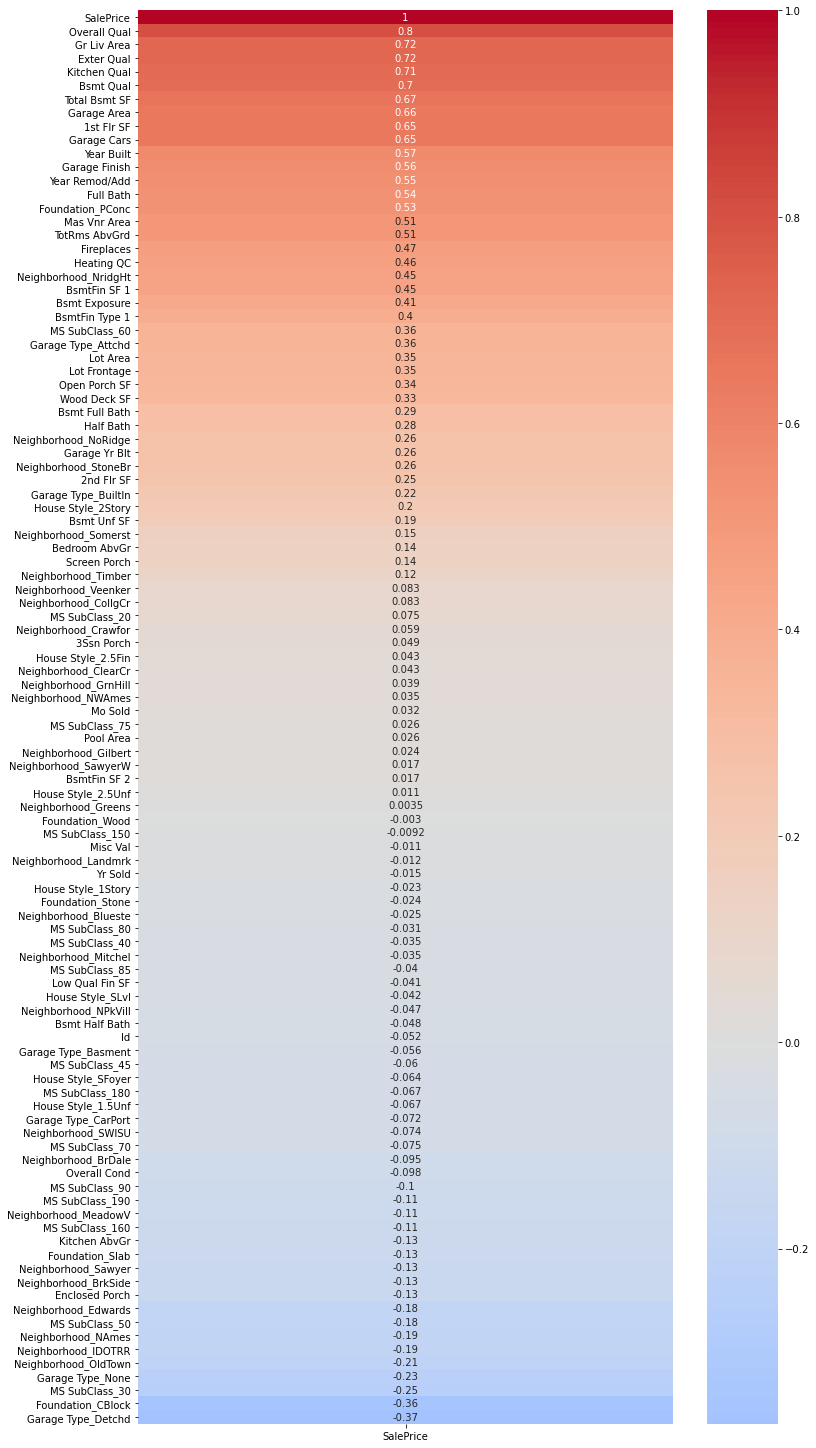

In [70]:
# Check for correlation directly against SalePrice

figure = plt.figure(figsize=(12,26))
sns.heatmap(housing_train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);

### Multicollinearity

In [71]:
# Check for multicollinearity between variables

corr_matrix = housing_train.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
sol.head(20)

Garage Yr Blt      Garage Type_None      0.998507
Id                 Yr Sold               0.975792
MS SubClass_80     House Style_SLvl      0.954546
Garage Cars        Garage Area           0.897370
MS SubClass_45     House Style_1.5Unf    0.869661
Gr Liv Area        TotRms AbvGrd         0.812407
Total Bsmt SF      1st Flr SF            0.809403
2nd Flr SF         House Style_2Story    0.807169
SalePrice          Overall Qual          0.804812
2nd Flr SF         House Style_1Story    0.797649
Foundation_CBlock  Foundation_PConc      0.774210
MS SubClass_60     House Style_2Story    0.757774
Kitchen AbvGr      MS SubClass_90        0.752759
MS SubClass_20     House Style_1Story    0.745677
MS SubClass_85     House Style_SFoyer    0.744239
Overall Qual       Exter Qual            0.738828
MS SubClass_75     House Style_2.5Unf    0.733027
Year Built         Bsmt Qual             0.726451
Exter Qual         Kitchen Qual          0.723796
SalePrice          Gr Liv Area           0.720763


In [72]:
# View columns

housing_train.columns

Index(['SalePrice', 'Id', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_None'],
      dtype='object', length=104)

Based on the correlation matrix, we can see that a few of the features are highly correlated with each other. Focusing on correlation above 85%, we'll drop the feature that has lower correlation with Sale Price in the heatmap. We'll ignore the ones with `Id`, `Garage Yr Blt`, `Garage Type_None`.


In [73]:
# Drop categories that exhibit multicollinearity and lower correlation against Sale Price

housing_train.drop('House Style_SLvl', axis=1, inplace=True)
housing_train.drop('Garage Cars', axis=1, inplace=True)
housing_train.drop('House Style_1.5Unf', axis=1, inplace=True)

In [74]:
# View correlation of all variables against sale Price

housing_train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.804812
Gr Liv Area,0.720763
Exter Qual,0.716685
Kitchen Qual,0.708784
Bsmt Qual,0.697292
Total Bsmt SF,0.667423
Garage Area,0.655568
1st Flr SF,0.651335
Year Built,0.573858


In [75]:
# We'll remove feature with very low correlation with Sale Price 0.2 < corr. value < -0.2

housing_train.drop(['Bsmt Unf SF', 'Neighborhood_Somerst', 'Bedroom AbvGr', 'Screen Porch', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_CollgCr', 'MS SubClass_20', 'Neighborhood_Crawfor', '3Ssn Porch', 'House Style_2.5Fin', 'Neighborhood_ClearCr', 'Neighborhood_GrnHill', 'Neighborhood_NWAmes', 'Mo Sold', 'MS SubClass_75', 'Pool Area', 'Neighborhood_Gilbert', 'Neighborhood_SawyerW', 'BsmtFin SF 2', 'House Style_2.5Unf', 'Neighborhood_Greens', 'Foundation_Wood', 'MS SubClass_150', 'Misc Val', 'Neighborhood_Landmrk', 'Yr Sold', 'House Style_1Story', 'Foundation_Stone', 'Neighborhood_Blueste', 'MS SubClass_80', 'MS SubClass_40', 'Neighborhood_Mitchel', 'MS SubClass_85', 'Low Qual Fin SF', 'Neighborhood_NPkVill', 'Bsmt Half Bath', 'Garage Type_Basment', 'MS SubClass_45', 'House Style_SFoyer','MS SubClass_180', 'Neighborhood_SWISU', 'Garage Type_CarPort', 'MS SubClass_70', 'Neighborhood_BrDale', 'Overall Cond', 'MS SubClass_90', 'MS SubClass_190', 'Neighborhood_MeadowV', 'MS SubClass_160', 'Kitchen AbvGr','Foundation_Slab', 'Neighborhood_Sawyer', 'Neighborhood_BrkSide', 'Enclosed Porch', 'Neighborhood_Edwards', 'MS SubClass_50', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR'], axis=1, inplace=True)

In [76]:
# View dataframe info

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalePrice             2045 non-null   int64  
 1   Id                    2045 non-null   int64  
 2   Lot Frontage          2045 non-null   float64
 3   Lot Area              2045 non-null   int64  
 4   Overall Qual          2045 non-null   int64  
 5   Year Built            2045 non-null   int64  
 6   Year Remod/Add        2045 non-null   int64  
 7   Mas Vnr Area          2045 non-null   float64
 8   Exter Qual            2045 non-null   int64  
 9   Bsmt Qual             2045 non-null   float64
 10  Bsmt Exposure         2045 non-null   int64  
 11  BsmtFin Type 1        2045 non-null   float64
 12  BsmtFin SF 1          2045 non-null   float64
 13  Total Bsmt SF         2045 non-null   float64
 14  Heating QC            2045 non-null   int64  
 15  1st Flr SF           

In [77]:
# Combining overall lot in square feet

housing_train['Total Lot'] = (housing_train['Lot Frontage'] + housing_train['Lot Area'])
housing_train.drop(['Lot Frontage', 'Lot Area'], axis=1, inplace=True)

In [78]:
# Combining squarefeet of the entire house

housing_train['Total SF'] = (housing_train['Total Bsmt SF'] + housing_train['1st Flr SF'] + housing_train['2nd Flr SF'] + housing_train['Gr Liv Area'])
housing_train.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area'], axis=1, inplace=True)

In [79]:
# Combining bathrooms

housing_train['Total Bath'] = (housing_train['Bsmt Full Bath'] + housing_train['Full Bath'] + housing_train['Half Bath'])
housing_train.drop(['Bsmt Full Bath', 'Full Bath', 'Half Bath'], axis=1, inplace=True)

In [80]:
# Combining outer area of the house, open porch and decks - they are similar in construction. 
# Typically porch has a roof and is partially closed, but this specific feature has an open porch so we can combine these two features

housing_train['Porch'] = (housing_train['Wood Deck SF'] + housing_train['Open Porch SF'])
housing_train.drop(['Wood Deck SF', 'Open Porch SF'], axis=1, inplace=True)

In [81]:
# To determine the age of the property, we'll be creating a function

def ageyears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2022 - x))

# create new columns to calculate age variables
housing_train['House Age'] = ageyears(housing_train['Year Built'])
housing_train['Remod Age'] = ageyears(housing_train['Year Remod/Add'])
housing_train['Garage Age'] = ageyears(housing_train['Garage Yr Blt'])

# drop
housing_train.drop(['Year Built','Year Remod/Add', 'Garage Yr Blt'],axis=1,inplace=True)


In [82]:
# View dataframe info

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalePrice             2045 non-null   int64  
 1   Id                    2045 non-null   int64  
 2   Overall Qual          2045 non-null   int64  
 3   Mas Vnr Area          2045 non-null   float64
 4   Exter Qual            2045 non-null   int64  
 5   Bsmt Qual             2045 non-null   float64
 6   Bsmt Exposure         2045 non-null   int64  
 7   BsmtFin Type 1        2045 non-null   float64
 8   BsmtFin SF 1          2045 non-null   float64
 9   Heating QC            2045 non-null   int64  
 10  Kitchen Qual          2045 non-null   float64
 11  TotRms AbvGrd         2045 non-null   int64  
 12  Fireplaces            2045 non-null   int64  
 13  Garage Finish         2045 non-null   int64  
 14  Garage Area           2045 non-null   float64
 15  MS SubClass_30       

In [83]:
# View correlation of all variables against sale Price

housing_train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
Total SF,0.815607
Overall Qual,0.804812
Exter Qual,0.716685
Kitchen Qual,0.708784
Bsmt Qual,0.697292
Garage Area,0.655568
Total Bath,0.622374
Garage Finish,0.560201
Foundation_PConc,0.532271


In [84]:
# Save final dataset

housing_train.to_csv('../datasets/housing_train_final.csv', index=False)

### Implement changes to test set

In [85]:
# Function to implement the changes to test dataset

def update_dataset(df):
    # Drop highly correlated features
    df.drop('House Style_SLvl', axis=1, inplace=True)
    df.drop('Garage Cars', axis=1, inplace=True)
    df.drop('House Style_1.5Unf', axis=1, inplace=True)
    
    # Remove feature with very low correlation with Sale Price 0.2 < corr. value < -0.2
    # We'll take out MS SubClass_150 and two of the neighborhoods (GreenHill and Landmark) as it's not in the test dataset
    # df.drop(['Bsmt Full Bath', 'Half Bath', 'Neighborhood_NoRidge', 'Garage Yr Blt', 'Neighborhood_StoneBr', '2nd Flr SF', 'Garage Type_BuiltIn', 'House Style_2Story', 'Bsmt Unf SF', 'Neighborhood_Somerst', 'Bedroom AbvGr', 'Screen Porch', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_CollgCr', 'MS SubClass_20', 'Neighborhood_Crawfor', '3Ssn Porch', 'House Style_2.5Fin', 'Neighborhood_ClearCr', 'Neighborhood_NWAmes', 'Mo Sold', 'MS SubClass_75', 'Pool Area', 'Neighborhood_Gilbert', 'Neighborhood_SawyerW', 'BsmtFin SF 2', 'House Style_2.5Unf', 'Neighborhood_Greens', 'Foundation_Wood', 'Misc Val', 'Yr Sold', 'House Style_1Story', 'Foundation_Stone', 'Neighborhood_Blueste', 'MS SubClass_80', 'MS SubClass_40', 'Neighborhood_Mitchel', 'MS SubClass_85', 'Low Qual Fin SF', 'Neighborhood_NPkVill', 'Bsmt Half Bath', 'Garage Type_Basment', 'MS SubClass_45', 'House Style_SFoyer','MS SubClass_180', 'Neighborhood_SWISU', 'Garage Type_CarPort', 'MS SubClass_70', 'Neighborhood_BrDale', 'Overall Cond', 'MS SubClass_90', 'MS SubClass_190', 'Neighborhood_MeadowV', 'MS SubClass_160', 'Kitchen AbvGr','Foundation_Slab', 'Neighborhood_Sawyer', 'Neighborhood_BrkSide', 'Enclosed Porch', 'Neighborhood_Edwards', 'MS SubClass_50', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR', 'Neighborhood_OldTown', 'Garage Type_None', 'MS SubClass_30'], axis=1, inplace=True)
    df.drop(['Bsmt Unf SF', 'Neighborhood_Somerst', 'Bedroom AbvGr', 'Screen Porch', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_CollgCr', 'MS SubClass_20', 'Neighborhood_Crawfor', '3Ssn Porch', 'House Style_2.5Fin', 'Neighborhood_ClearCr', 'Neighborhood_NWAmes', 'Mo Sold', 'MS SubClass_75', 'Pool Area', 'Neighborhood_Gilbert', 'Neighborhood_SawyerW', 'BsmtFin SF 2', 'House Style_2.5Unf', 'Neighborhood_Greens', 'Foundation_Wood', 'Misc Val', 'Yr Sold', 'House Style_1Story', 'Foundation_Stone', 'Neighborhood_Blueste', 'MS SubClass_80', 'MS SubClass_40', 'Neighborhood_Mitchel', 'MS SubClass_85', 'Low Qual Fin SF', 'Neighborhood_NPkVill', 'Bsmt Half Bath', 'Garage Type_Basment', 'MS SubClass_45', 'House Style_SFoyer','MS SubClass_180', 'Neighborhood_SWISU', 'Garage Type_CarPort', 'MS SubClass_70', 'Neighborhood_BrDale', 'Overall Cond', 'MS SubClass_90', 'MS SubClass_190', 'Neighborhood_MeadowV', 'MS SubClass_160', 'Kitchen AbvGr','Foundation_Slab', 'Neighborhood_Sawyer', 'Neighborhood_BrkSide', 'Enclosed Porch', 'Neighborhood_Edwards', 'MS SubClass_50', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR'], axis=1, inplace=True)
    
    # Combining overall lot in square feet
    df['Total Lot'] = (df['Lot Frontage'] + df['Lot Area'])
    df.drop(['Lot Frontage', 'Lot Area'], axis=1, inplace=True)
    
    # Combining squarefeet of the entire house
    df['Total SF'] = (df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Gr Liv Area'])
    df.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area'], axis=1, inplace=True)
    
    # Combining bathrooms
    df['Total Bath'] = (df['Bsmt Full Bath'] + df['Full Bath'] + df['Half Bath'])
    df.drop(['Bsmt Full Bath', 'Full Bath', 'Half Bath'], axis=1, inplace=True)
    
    # Combining porch and deck
    df['Porch'] = (df['Wood Deck SF'] + df['Open Porch SF'])
    df.drop(['Wood Deck SF', 'Open Porch SF'], axis=1, inplace=True)
    
    def ageyears(feature): 
        return feature.apply(lambda x: 0 if x==0 else (2022 - x))

    # Create new columns to calculate age variables
    df['House Age'] = ageyears(df['Year Built'])
    df['Remod Age'] = ageyears(df['Year Remod/Add'])
    df['Garage Age'] = ageyears(df['Garage Yr Blt'])

    # Drop year columns
    df.drop(['Year Built','Year Remod/Add','Garage Yr Blt'],axis=1,inplace=True)
    
    return df

In [86]:
# Executing changes on test dataset

housing_test = update_dataset(housing_test)

In [87]:
# Save final dataset

housing_test.to_csv('../datasets/housing_test_final.csv', index=False)

In [88]:
# Check train dataset

housing_train.shape

(2045, 35)

In [89]:
# Check test dataset

housing_test.shape

(878, 34)

In [90]:
# Check for features in training set but not in test dataset, 
# The 'SalePrice' column will be added later on

[x for x in housing_train if x not in housing_test]

['SalePrice']

In [91]:
# Check for features in test set but not in training dataset

[x for x in housing_test if x not in housing_train]

[]

## Data Modeling & Evaluation

### Modeling

We'll start the modeling process by setting a baseline model:

In [92]:
# Setting baseline model

X = housing_train.drop(columns=['Id', 'SalePrice'])
Y = housing_train['SalePrice']

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, Y)

DummyRegressor()

In [93]:
dummy_preds = dummy_regr.predict(X)

In [94]:
dummy_r2 = dummy_regr.score(X, Y)
print(f"Baseline model R2 score: {dummy_r2}")

dummy_rmse = np.sqrt(mean_squared_error(Y, dummy_preds))
print(f"Baseline model RMSE score: {dummy_rmse}")

Baseline model R2 score: 0.0
Baseline model RMSE score: 79245.28079403238


Next, we'll start splitting our data into training set and validation set:

In [95]:
# Train-test split into training set and validation set
# Random state of 10

X_train, X_test, y_train, y_test = train_test_split(housing_train.drop(columns=['Id', 'SalePrice']), housing_train['SalePrice'], test_size=0.2, random_state = 10)

In [96]:
# Scaling the dataset

ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [97]:
# Instantiate models

lr = LinearRegression()
lasso = LassoCV(n_alphas=100)
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))

Afterwards, we use cross-validation to evaluate our models:

In [98]:
# Testing linear regression model

lr_cv_scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr_cv_mean = lr_cv_scores.mean()
print(f"Linear Regression R2 cross-validation score: {lr_cv_mean}")
      
lr_cv_mse_scores = -cross_val_score(lr,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lr_cv_rmse_mean = np.sqrt(lr_cv_mse_scores.mean())
print(f"Linear regression RSME cross-validation score:' {lr_cv_rmse_mean}")

Linear Regression R2 cross-validation score: 0.8869930771159625
Linear regression RSME cross-validation score:' 26484.670185389485


In [99]:
# Testing lasso model 

lasso_cv_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_cv_mean = lasso_cv_scores.mean()
print(f"Lasso R2 cross-validation score: {lasso_cv_mean}")

lasso_cv_mse_scores = -cross_val_score(lasso,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lasso_cv_rmse_mean = np.sqrt(lasso_cv_mse_scores.mean())
print(f"Lasso RSME cross-validation score: {lasso_cv_rmse_mean}")

Lasso R2 cross-validation score: 0.8868701881008692
Lasso RSME cross-validation score: 26501.68352595534


In [100]:
# Testing ridge model

ridge_cv_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_cv_mean = ridge_cv_scores.mean()
print(f"Ridge R2 cross-validation score: {ridge_cv_mean}")

ridge_cv_mse_scores = -cross_val_score(ridge,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
ridge_cv_rmse_mean = np.sqrt(ridge_cv_mse_scores.mean())
print(f"Ridge RSME cross-validation score: {ridge_cv_rmse_mean}")

Ridge R2 cross-validation score: 0.8870721215417463
Ridge RSME cross-validation score: 26477.718321623302


The R2 and RMSE figures for all models are very close. However, the Ridge model has the best result. Hence, we'll likely use Ridge model to run the test dataset later.

Next, we'll be building out each of the model in detail:

In [101]:
# Building linear regression model

lr.fit(X_train_sc, y_train)

print("Linear Regression:")
print()
linear_train_r = lr.score(X_train_sc,y_train)
print(f"R2 for training dataset: {linear_train_r}")
linear_test_r = lr.score(X_test_sc,y_test)
print(f"R2 validation dataset: {linear_test_r}")
print(f"R2 for cross-validation sets: {lr_cv_mean}")
print()
linear_train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_sc)))
print(f"RMSE for training dataset: {linear_train_rmse}")
linear_test_rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test_sc)))
print(f"RMSE for validation dataset: {linear_test_rmse}")
print(f"RMSE for cross-validation sets: {lr_cv_rmse_mean}")

Linear Regression:

R2 for training dataset: 0.8955371879781225
R2 validation dataset: 0.9006853458108669
R2 for cross-validation sets: 0.8869930771159625

RMSE for training dataset: 25550.13991478177
RMSE for validation dataset: 25194.946810657984
RMSE for cross-validation sets: 26484.670185389485


In [102]:
# Displaying linear regression coefficient in a dataframe

lr_coeff = pd.DataFrame()
lr_coeff['Column_Name'] = X_train.columns
lr_coeff['Coefficient_Value'] = pd.Series(lr.coef_)
lr_coeff

,Column_Name,Coefficient_Value
0,Overall Qual,13543.032280
1,Mas Vnr Area,4220.656815
2,Exter Qual,5128.602886
3,Bsmt Qual,5487.117147
4,Bsmt Exposure,4294.520615
5,BsmtFin Type 1,-2198.413448
6,BsmtFin SF 1,10015.202917
7,Heating QC,2214.421817
8,Kitchen Qual,9738.563463
9,TotRms AbvGrd,1111.614668


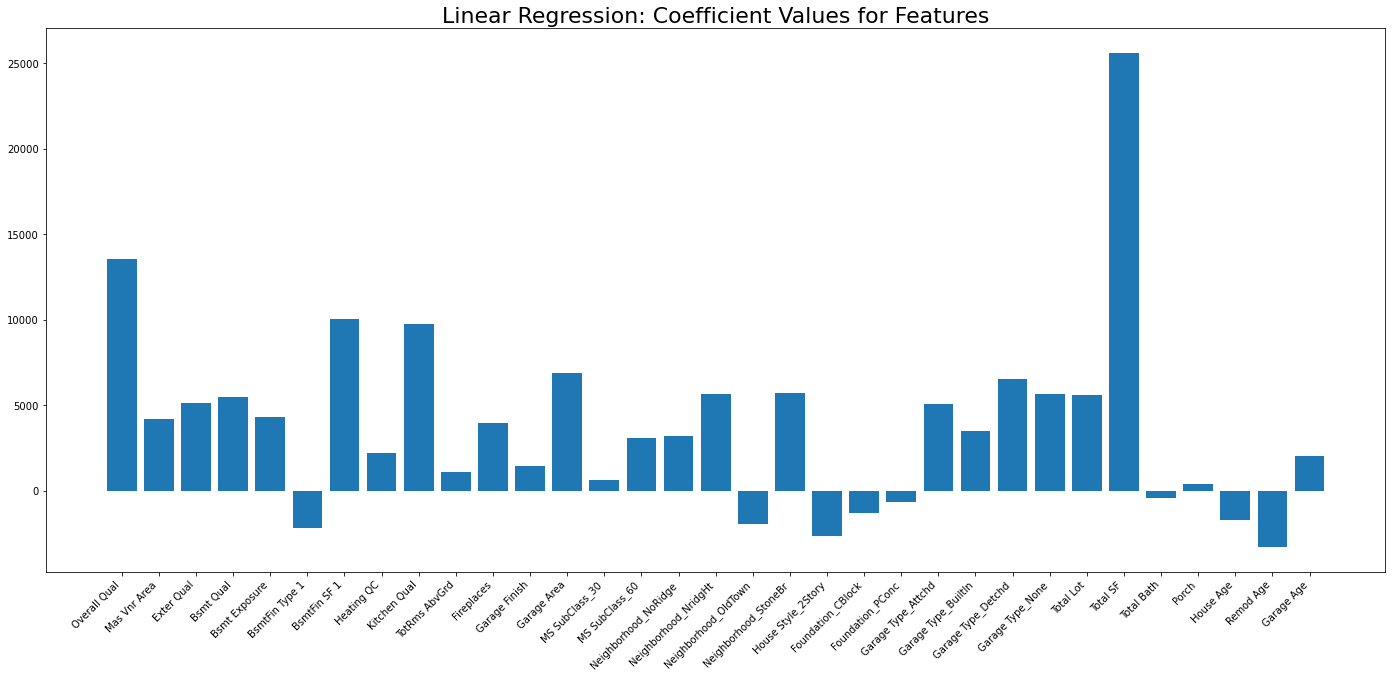

In [103]:
# Displaying linear regression coefficient in a bar chart

plt.rcParams['figure.figsize'] = (24,10)
plt.bar(lr_coeff["Column_Name"], lr_coeff['Coefficient_Value'])
plt.xticks(rotation=45, ha='right')
plt.title('Linear Regression: Coefficient Values for Features', fontsize=22)
plt.show()

In [104]:
# Building lasso model

lasso.fit(X_train_sc, y_train)

lasso_alpha = lasso.alpha_
lasso_alpha

64.78263512623964

In [105]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=64.78263512623964)

In [106]:
print("Lasso Regression:")
print()
lasso_train_r = lasso.score(X_train_sc,y_train)
print(f"R2 for training dataset: {lasso_train_r}")
lasso_test_r = lasso.score(X_test_sc,y_test)
print(f"R2 validation dataset: {lasso_test_r}")
print(f"R2 for cross-validation sets: {lasso_cv_mean}")
print()
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc)))
print(f"RMSE for training dataset: {lasso_train_rmse}")
lasso_test_rmse = np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_sc)))
print(f"RMSE for validation dataset: {lasso_test_rmse}")
print(f"RMSE for cross-validation sets: {lasso_cv_rmse_mean}")

Lasso Regression:

R2 for training dataset: 0.8954250987232872
R2 validation dataset: 0.9009459284134416
R2 for cross-validation sets: 0.8868701881008692

RMSE for training dataset: 25563.843970109272
RMSE for validation dataset: 25161.871746918125
RMSE for cross-validation sets: 26501.68352595534


In [107]:
# Displaying lasso regression coefficient in a dataframe

lasso_coeff = pd.DataFrame()
lasso_coeff['Column_Name'] = X_train.columns
lasso_coeff['Coefficient_Value'] = pd.Series(lasso.coef_)
lasso_coeff

,Column_Name,Coefficient_Value
0,Overall Qual,13587.594790
1,Mas Vnr Area,4232.527156
2,Exter Qual,5204.044548
3,Bsmt Qual,5425.975705
4,Bsmt Exposure,4254.037355
5,BsmtFin Type 1,-2040.387924
6,BsmtFin SF 1,9841.646021
7,Heating QC,2100.425404
8,Kitchen Qual,9768.790411
9,TotRms AbvGrd,981.657250


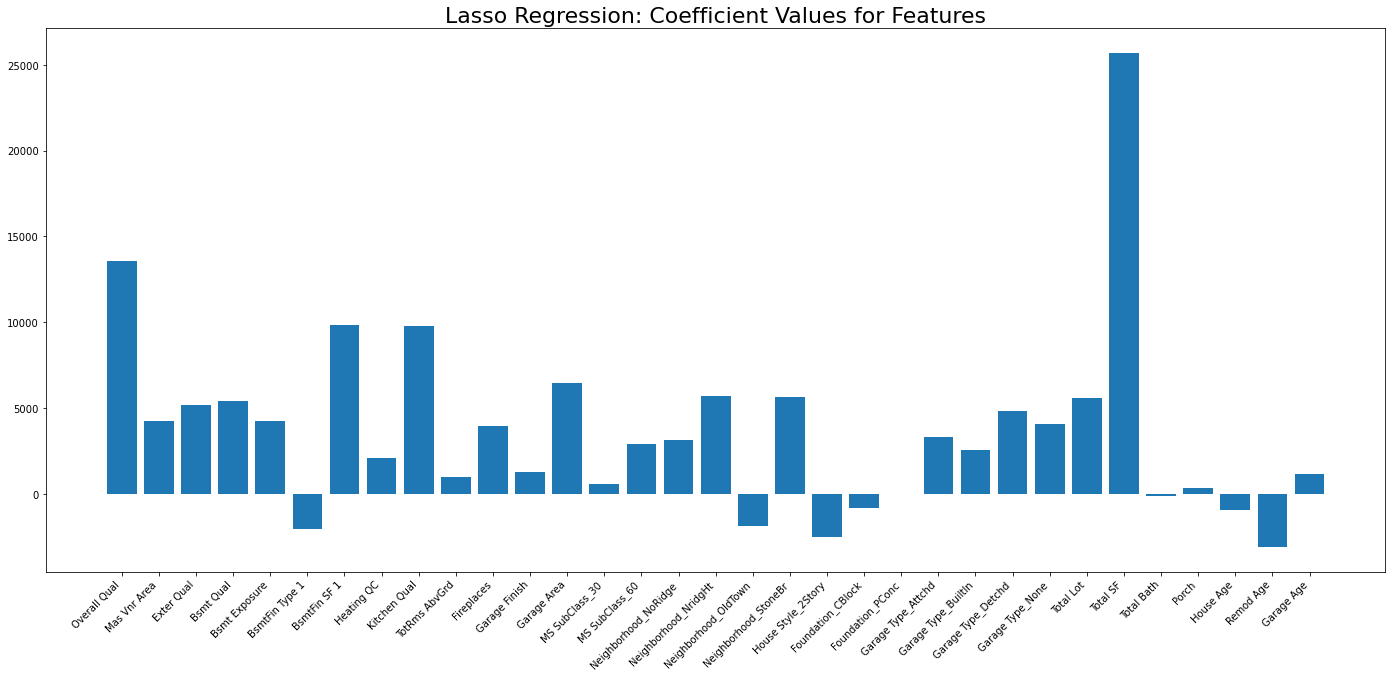

In [108]:
# Displaying lasso regression coefficient in a bar chart

plt.rcParams['figure.figsize'] = (24,10)
plt.bar(lasso_coeff["Column_Name"], lasso_coeff['Coefficient_Value'])
plt.xticks(rotation=45, ha='right')
plt.title('Lasso Regression: Coefficient Values for Features', fontsize=22)
plt.show()

In [109]:
# Building ridge model

ridge.fit(X_train_sc,y_train)

ridge_alpha = ridge.alpha_
ridge_alpha

21.1010101010101

In [110]:
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train_sc, y_train)

Ridge(alpha=21.1010101010101)

In [111]:
print("Ridge Regression:")
print()
ridge_train_r = ridge.score(X_train_sc,y_train)
print(f"R2 for training dataset: {ridge_train_r}")
ridge_test_r = ridge.score(X_test_sc,y_test)
print(f"R2 validation dataset: {ridge_test_r}")
print(f"R2 for cross-validation sets: {ridge_cv_mean}")
print()
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc)))
print(f"RMSE for training dataset: {ridge_train_rmse}")
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_sc)))
print(f"RMSE for validation dataset: {ridge_test_rmse}")
print(f"RMSE for cross-validation sets: {ridge_cv_rmse_mean}")

Ridge Regression:

R2 for training dataset: 0.8954352784890078
R2 validation dataset: 0.9011886582775838
R2 for cross-validation sets: 0.8870721215417463

RMSE for training dataset: 25562.599693171233
RMSE for validation dataset: 25131.023525328026
RMSE for cross-validation sets: 26477.718321623302


In [112]:
# Displaying ridge regression coefficient in a dataframe

ridge_coeff = pd.DataFrame()
ridge_coeff['Column_Name'] = X_train.columns
ridge_coeff['Coefficient_Value'] = pd.Series(ridge.coef_)
ridge_coeff

,Column_Name,Coefficient_Value
0,Overall Qual,13428.889123
1,Mas Vnr Area,4322.528200
2,Exter Qual,5322.785874
3,Bsmt Qual,5517.290654
4,Bsmt Exposure,4272.581668
5,BsmtFin Type 1,-2058.626178
6,BsmtFin SF 1,9868.869482
7,Heating QC,2222.173696
8,Kitchen Qual,9713.652300
9,TotRms AbvGrd,1707.296119


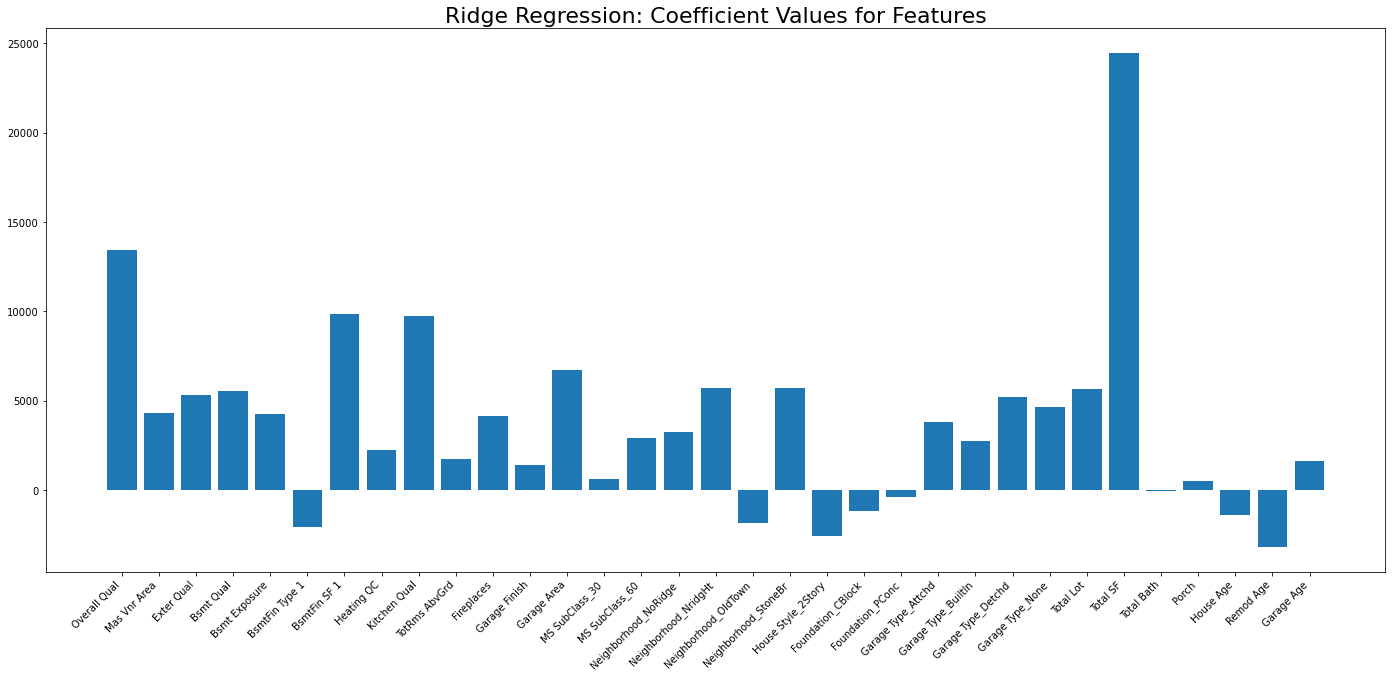

In [113]:
# Displaying ridge regression coefficient in a bar chart

plt.rcParams['figure.figsize'] = (24,10)
plt.bar(ridge_coeff["Column_Name"], ridge_coeff['Coefficient_Value'])
plt.xticks(rotation=45, ha='right')
plt.title('Ridge Regression: Coefficient Values for Features', fontsize=22)
plt.show()

### Evaluation

In [114]:
# Creating table of the results

results = pd.DataFrame(data=[["Baseline", 0, 0, dummy_r2, 0, 0, dummy_rmse], 
                               ["Linear", linear_train_r, linear_test_r, lr_cv_mean, linear_train_rmse, linear_test_rmse, lr_cv_rmse_mean],
                                ["Lasso", lasso_train_r, lasso_test_r, lasso_cv_mean, lasso_train_rmse, lasso_test_rmse, lasso_cv_rmse_mean],
                                ["Ridge", ridge_train_r, ridge_test_r, ridge_cv_mean, ridge_train_rmse, ridge_test_rmse, ridge_cv_rmse_mean]],
                                columns=['Model', 'R2 Train Set','R2 Test Set', 'R2 Cross-Val', 'RMSE Train Set','RMSE Test Set', 'RMSE Cross-Val'])

results

,Model,R2 Train Set,R2 Test Set,R2 Cross-Val,RMSE Train Set,RMSE Test Set,RMSE Cross-Val
0,Baseline,0.000000,0.000000,0.000000,0.000000,0.000000,79245.280794
1,Linear,0.895537,0.900685,0.886993,25550.139915,25194.946811,26484.670185
2,Lasso,0.895425,0.900946,0.886870,25563.843970,25161.871747,26501.683526
3,Ridge,0.895435,0.901189,0.887072,25562.599693,25131.023525,26477.718322


Based on the consolidated results, 
1. There's not much difference in scores across the models, indicating that regularization models didn't make much difference to the prediction - this also means that the variables are resilient and independent of models
2. Linear model appears to perform better on the training set, based on the `R2 Train Set` and `RMSE Train Set` scores
3. The Ridge model has the best performance for the test set and cross-validation sets, which we would trust for higher accuracy as the model was run unseen data

Hence, we'll proceed to use the Ridge model to produce the Sale Price on the validation set and compare it against the actual Sale Price listed:

Text(0.5, 1.0, 'Ridge Predictions of Sale Price vs Actual Sale Price')

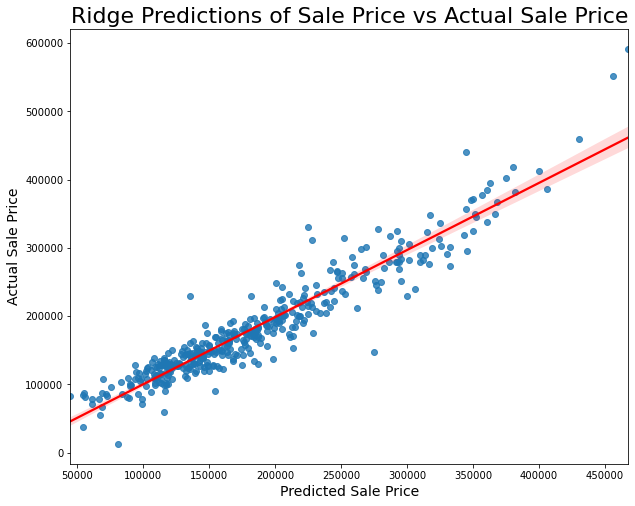

In [115]:
# Predicting the Sale Price on test dataset and comparing against the actual Sale Price listed

ridge_preds = ridge.predict(X_test_sc)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_sc, x=ridge_preds, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Ridge Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Despite a few outliers at higher value, the line of best fit passes through most of the actual Sale Price and there's small variation from the line to the data point. This means that the model works relatively well in predicting Sale Price of homes.

Let's take a closer look at the features:

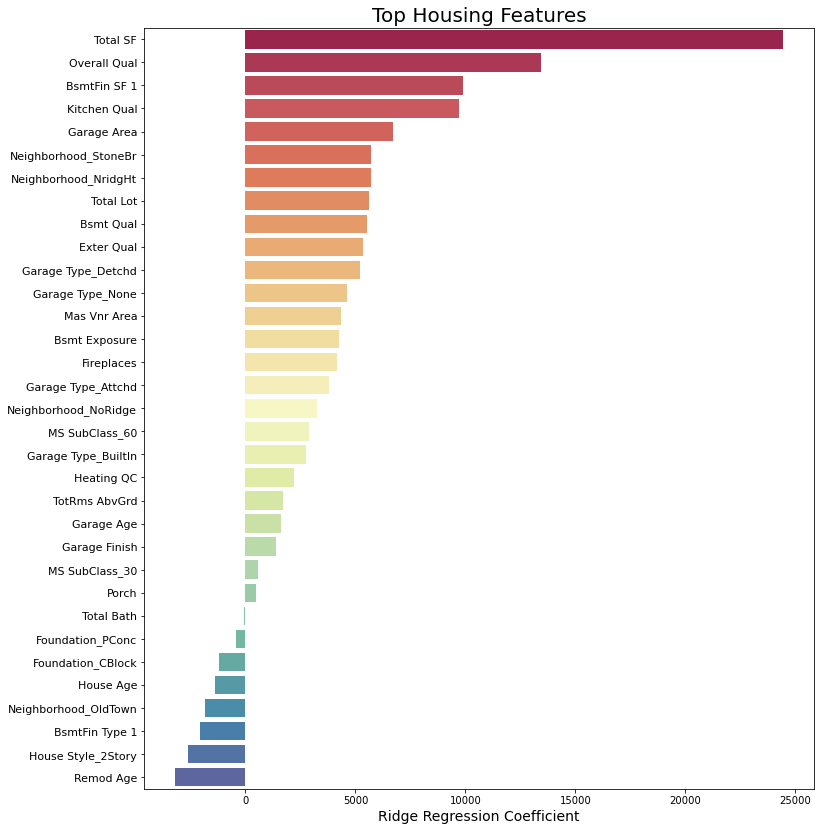

In [116]:
plt.figure(figsize=(12,14))
data = ridge_coeff.sort_values(by='Coefficient_Value', ascending=False).head(40).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Column_Name', x='Coefficient_Value', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Column_Name'], size=11)
ax.set_xlabel('Ridge Regression Coefficient', fontsize=14)
plt.title('Top Housing Features', fontsize=20);

In [117]:
ridge_coeff.sort_values(by='Coefficient_Value', ascending=False)

,Column_Name,Coefficient_Value
27,Total SF,24455.449767
0,Overall Qual,13428.889123
6,BsmtFin SF 1,9868.869482
8,Kitchen Qual,9713.652300
12,Garage Area,6714.522488
18,Neighborhood_StoneBr,5726.712394
16,Neighborhood_NridgHt,5697.156445
26,Total Lot,5631.350054
3,Bsmt Qual,5517.290654
2,Exter Qual,5322.785874


Based on the chart and table above, the top five predictors are: 
1. `Total SF`: This includes living area, 1st floor and 2nd floor
2. `Overall Qual`: This refers to the overall material and finish of the house
3. `BsmtFin SF`: This refers to the finished basement area 1 in square feet
4. `Kitchen Qual`: This refers to overall kitchen quality
5. `Garage Area`: This refers to the size of the garage space

Interestingly, certain neighborhoods are also strong price predictors - these are Stone Brook and Northridge Heights. Other basement and garage features are also important price predictors, signaling that these are important factors for buyers.

On the lower end of the graph and chart, we see that when the house was last remodeled and houses with 2-stories had a negative correlation on the price. It's also interesting to note that basement finish type 1 had a negative impact on house price, when the area of basement finishing in square feet is a strong predictor - this could be because of the way the study was done that may not have gathered accurate insight or buyers may prefer lower quality/ unfinished basement area for them to renovate to their preference later on.

## Kaggle Submission

We've also used the Ridge model to predict the Sale Price in the test dataset (with no actual price listed) and uploaded on Kaggle to assess the RMSE score.

In [118]:
# Scale the variables on test dataset

X_final = housing_test.drop(columns=['Id'], axis=1)
X_final_sc = ss.transform(X_final)

In [119]:
# Generate sale prices and input into new column

final_ridge_preds = ridge.predict(X_final_sc)
housing_test['SalePrice'] = final_ridge_preds

In [120]:
# Create new dataframe of just ID and sale price for Kaggle submission
for_kaggle = housing_test[['Id', 'SalePrice']].copy()
for_kaggle.head()

,Id,SalePrice
0,2658,135524.427237
1,2718,185803.101128
2,2414,214236.154691
3,1989,116787.889778
4,625,183567.414133


In [121]:
# Save dataframe into csv

for_kaggle.to_csv('../datasets/kaggle_submission.csv', index=False)

With the ridge model, the predicted sale prices received an RMSE score of **$25,931** on Kaggle (screenshot below). This is good news that our model works well as the RMSE score is lower than the RMSE scores we received from the training set, validation set and cross-validation sets.

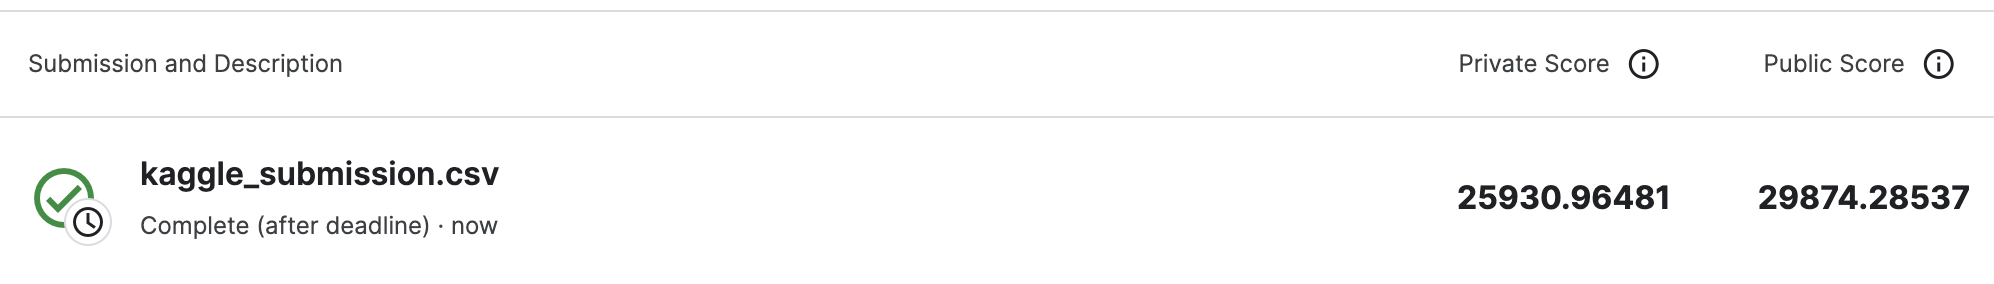

## Additional References

[Ames, Iowa Housing Set Data Information](http://jse.amstat.org/v19n3/decock.pdf)
- This guidance was written by the data owner on how educators can use the dataset for Statistics courses. 
- I referred to this guidance to better understand the dataset, how it was collected, how to best approach feature selection and implement the regression models.


## Conclusion

In summary, our model has 32 key predictors of housing prices. The coefficient value listed indicate the magnitude of influence the predictor has on housing price. Taking the top five predictors:
1. `Total SF`: With a 1 unit increase in area square feet, we can see 24,455.45 dollars increase in housing price.
2. `Overall Qual`: When the overall quality and finish of the house improves by 1 unit, housing price increase by 13,428.89 dollars.
3. `BsmtFin SF`: As finished basement area increases by 1 unit square feet, the house price will increase by 9,868.87 dollars.
4. `Kitchen Qual`: As overall kitchen quality increases by 1 unit, the house price will increase by 9,713.65 dollars.
5. `Garage Area`: When the size of the garage space increases by 1 unit square feet, the price increase by 6,714.52 dollars. 

While we selected the Ridge model due to the slight improvement in cross-validation score, our results from the three models (Linear, Lasso, Ridge) had minor differences from each other. This reaffirms that the variables selected are robust enough to predict prices regardless of the model selected - hence making the model generalizable to new datasets*.

*This model is most applicable to housing datasets for Ames, Iowa. While this model can be used in other location, but we encourage keeping in mind the different external factors present in other areas as well.


## Recommendations

Through this model, real estate agents can advise homeowners to increase their property's market value by:
- Expanding the area in the house and garage space through renovation
- Maintaining and enhancing the house exterior and finishing 
- Refresh and revamp kitchen to include newer furnishing and appliances
- While having a nice basement is a nice touch, but owners should focus on other aspects of the house as buyers are likely to prefer a bigger basement over a nice basement

Real estate agents in Ames, Iowa will also be equipped to:
- Ensure all home listings show all the top predictors in the best light to attract buyers 
- Look into the features and better understand why some of them matter and some don't
- Ensure representation in data collection (some of the neighborhoods didn't have enough data to generate mean for Lot Frontage missing values earlier)
- In the next round of data collection, define the characteristics for categorical variables better, e.g. "Average" and "Fair" can sound similar to users, and can be combined